In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, t

In [3]:
riskforecasting = pd.read_csv('~data/pollution_risk_forecasting.csv')
riskforecasting

site        time  riskLevelLabel
0       ukc1101-06000  2020-05-14             0.0
1       ukc1101-06000  2020-05-15             0.0
2       ukc1101-06000  2020-05-16             0.0
3       ukc1101-06000  2020-05-17             0.0
4       ukc1101-06000  2020-05-18             0.0
...               ...         ...             ...
187110  ukk4307-33900  2022-09-26             0.0
187111  ukk4307-33900  2022-09-27             0.0
187112  ukk4307-33900  2022-09-28             0.0
187113  ukk4307-33900  2022-09-29             0.0
187114  ukk4307-33900  2022-09-30             0.0

[187115 rows x 3 columns]

In [4]:
feature_na = pd.read_csv('~data/feature_extraction_15x15.csv')
feature_na

time           site  BBP_1x1_median  CDM_1x1_median  \
0       2020-01-01  ukc1101-06000             NaN             NaN   
1       2020-01-01  ukc1101-06100             NaN             NaN   
2       2020-01-01  ukc1101-06200             NaN             NaN   
3       2020-01-01  ukc1202-06300             NaN             NaN   
4       2020-01-01  ukc1202-06400             NaN             NaN   
...            ...            ...             ...             ...   
471275  2022-12-31  ukk4306-22800             NaN             NaN   
471276  2022-12-31  ukk4306-22900             NaN             NaN   
471277  2022-12-31  ukk4306-23000             NaN             NaN   
471278  2022-12-31  ukk4307-33800             NaN             NaN   
471279  2022-12-31  ukk4307-33900             NaN             NaN   

        SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  CHL_1x1_median  \
0                  NaN               NaN             NaN             NaN   
1                  NaN               NaN             NaN             NaN   
2                  NaN               NaN             NaN             NaN   
3                  NaN               NaN             NaN             NaN   
4                  NaN               NaN             NaN             NaN   
...                ...               ...             ...             ...   
471275             NaN               NaN             NaN             NaN   
471276             NaN               NaN             NaN             NaN   
471277             NaN               NaN             NaN             NaN   
471278             NaN               NaN             NaN             NaN   
471279             NaN               NaN             NaN             NaN   

        BBP_1x1_mean  CDM_1x1_mean  ...  SPM_15x15_q1  KD490_15x15_q1  \
0                NaN           NaN  ...           NaN             NaN   
1                NaN           NaN  ...           NaN             NaN   
2                NaN           NaN  ...           NaN             NaN   
3                NaN           NaN  ...      2.218511        0.155469   
4                NaN           NaN  ...      2.088109        0.147391   
...              ...           ...  ...           ...             ...   
471275           NaN           NaN  ...           NaN             NaN   
471276           NaN           NaN  ...           NaN             NaN   
471277           NaN           NaN  ...           NaN             NaN   
471278           NaN           NaN  ...           NaN             NaN   
471279           NaN           NaN  ...           NaN             NaN   

        ZSD_15x15_q1  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
0                NaN           NaN           NaN           NaN           NaN   
1                NaN           NaN           NaN           NaN           NaN   
2                NaN           NaN           NaN           NaN           NaN   
3           4.414686      2.392838           NaN           NaN      2.355747   
4           4.552876      2.188390           NaN           NaN      2.351558   
...              ...           ...           ...           ...           ...   
471275           NaN           NaN           NaN           NaN           NaN   
471276           NaN           NaN           NaN           NaN           NaN   
471277           NaN           NaN           NaN           NaN           NaN   
471278           NaN           NaN           NaN           NaN           NaN   
471279           NaN           NaN           NaN           NaN           NaN   

        KD490_15x15_q3  ZSD_15x15_q3  CHL_15x15_q3  
0                  NaN           NaN           NaN  
1                  NaN           NaN           NaN  
2                  NaN           NaN           NaN  
3             0.164187      4.705874      2.620098  
4             0.159994      5.009740      2.510444  
...                ...           ...           ...  
471275             NaN           NaN           NaN  
471276    

In [7]:
feature_neg = pd.read_csv('~data/feature_extraction_15x15_neg10.csv')
feature_neg

time           site  BBP_1x1_median  CDM_1x1_median  \
0       2020-01-01  ukc1101-06000           -10.0           -10.0   
1       2020-01-01  ukc1101-06100           -10.0           -10.0   
2       2020-01-01  ukc1101-06200           -10.0           -10.0   
3       2020-01-01  ukc1202-06300           -10.0           -10.0   
4       2020-01-01  ukc1202-06400           -10.0           -10.0   
...            ...            ...             ...             ...   
471275  2022-12-31  ukk4306-22800           -10.0           -10.0   
471276  2022-12-31  ukk4306-22900           -10.0           -10.0   
471277  2022-12-31  ukk4306-23000           -10.0           -10.0   
471278  2022-12-31  ukk4307-33800           -10.0           -10.0   
471279  2022-12-31  ukk4307-33900           -10.0           -10.0   

        SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  CHL_1x1_median  \
0           -10.000000        -10.000000      -10.000000      -10.000000   
1           -10.000000        -10.000000      -10.000000      -10.000000   
2           -10.000000        -10.000000      -10.000000      -10.000000   
3             2.275929          0.160749        4.534724        2.531511   
4             2.215205          0.155033        4.743151        2.385542   
...                ...               ...             ...             ...   
471275      -10.000000        -10.000000      -10.000000      -10.000000   
471276      -10.000000        -10.000000      -10.000000      -10.000000   
471277      -10.000000        -10.000000      -10.000000      -10.000000   
471278      -10.000000        -10.000000      -10.000000      -10.000000   
471279      -10.000000        -10.000000      -10.000000      -10.000000   

        BBP_1x1_mean  CDM_1x1_mean  ...  SPM_15x15_q1  KD490_15x15_q1  \
0              -10.0         -10.0  ...    -10.000000      -10.000000   
1              -10.0         -10.0  ...    -10.000000      -10.000000   
2              -10.0         -10.0  ...    -10.000000      -10.000000   
3              -10.0         -10.0  ...      2.275929        0.160749   
4              -10.0         -10.0  ...      2.215205        0.155033   
...              ...           ...  ...           ...             ...   
471275         -10.0         -10.0  ...    -10.000000      -10.000000   
471276         -10.0         -10.0  ...    -10.000000      -10.000000   
471277         -10.0         -10.0  ...    -10.000000      -10.000000   
471278         -10.0         -10.0  ...    -10.000000      -10.000000   
471279         -10.0         -10.0  ...    -10.000000      -10.000000   

        ZSD_15x15_q1  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
0         -10.000000    -10.000000         -10.0         -10.0    -10.000000   
1         -10.000000    -10.000000         -10.0         -10.0    -10.000000   
2         -10.000000    -10.000000         -10.0         -10.0    -10.000000   
3           4.534724      2.531511         -10.0         -10.0      2.275929   
4           4.743151      2.385542         -10.0         -10.0      2.215205   
...              ...           ...           ...           ...           ...   
471275    -10.000000    -10.000000         -10.0         -10.0    -10.000000   
471276    -10.000000    -10.000000         -10.0         -10.0    -10.000000   
471277    -10.000000    -10.000000         -10.0         -10.0    -10.000000   
471278    -10.000000    -10.000000         -10.0         -10.0    -10.000000   
471279    -10.000000    -10.000000         -10.0         -10.0    -10.000000   

        KD490_15x15_q3  ZSD_15x15_q3  CHL_15x15_q3  
0           -10.000000    -10.000000    -10.000000  
1           -10.000000    -10.000000    -10.000000  
2           -10.000000    -10.000000    -10.000000  
3             0.160749      4.534724      2.531511  
4             0.155033      4.743151      2.385542  
...                ...           ...           ...  
471275      -10.000000    -10.000000    -10.000000  
471276    

In [8]:
feature_zero = pd.read_csv('~data/feature_extraction_15x15_zero.csv')
feature_zero

time           site  BBP_1x1_median  CDM_1x1_median  \
0       2020-01-01  ukc1101-06000             0.0             0.0   
1       2020-01-01  ukc1101-06100             0.0             0.0   
2       2020-01-01  ukc1101-06200             0.0             0.0   
3       2020-01-01  ukc1202-06300             0.0             0.0   
4       2020-01-01  ukc1202-06400             0.0             0.0   
...            ...            ...             ...             ...   
471275  2022-12-31  ukk4306-22800             0.0             0.0   
471276  2022-12-31  ukk4306-22900             0.0             0.0   
471277  2022-12-31  ukk4306-23000             0.0             0.0   
471278  2022-12-31  ukk4307-33800             0.0             0.0   
471279  2022-12-31  ukk4307-33900             0.0             0.0   

        SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  CHL_1x1_median  \
0             0.000000          0.000000        0.000000        0.000000   
1             0.000000          0.000000        0.000000        0.000000   
2             0.000000          0.000000        0.000000        0.000000   
3             2.275929          0.160749        4.534724        2.531511   
4             2.215205          0.155033        4.743151        2.385542   
...                ...               ...             ...             ...   
471275        0.000000          0.000000        0.000000        0.000000   
471276        0.000000          0.000000        0.000000        0.000000   
471277        0.000000          0.000000        0.000000        0.000000   
471278        0.000000          0.000000        0.000000        0.000000   
471279        0.000000          0.000000        0.000000        0.000000   

        BBP_1x1_mean  CDM_1x1_mean  ...  SPM_15x15_q1  KD490_15x15_q1  \
0                0.0           0.0  ...      0.000000        0.000000   
1                0.0           0.0  ...      0.000000        0.000000   
2                0.0           0.0  ...      0.000000        0.000000   
3                0.0           0.0  ...      2.275929        0.160749   
4                0.0           0.0  ...      2.215205        0.155033   
...              ...           ...  ...           ...             ...   
471275           0.0           0.0  ...      0.000000        0.000000   
471276           0.0           0.0  ...      0.000000        0.000000   
471277           0.0           0.0  ...      0.000000        0.000000   
471278           0.0           0.0  ...      0.000000        0.000000   
471279           0.0           0.0  ...      0.000000        0.000000   

        ZSD_15x15_q1  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
0           0.000000      0.000000           0.0           0.0      0.000000   
1           0.000000      0.000000           0.0           0.0      0.000000   
2           0.000000      0.000000           0.0           0.0      0.000000   
3           4.534724      2.531511           0.0           0.0      2.275929   
4           4.743151      2.385542           0.0           0.0      2.215205   
...              ...           ...           ...           ...           ...   
471275      0.000000      0.000000           0.0           0.0      0.000000   
471276      0.000000      0.000000           0.0           0.0      0.000000   
471277      0.000000      0.000000           0.0           0.0      0.000000   
471278      0.000000      0.000000           0.0           0.0      0.000000   
471279      0.000000      0.000000           0.0           0.0      0.000000   

        KD490_15x15_q3  ZSD_15x15_q3  CHL_15x15_q3  
0             0.000000      0.000000      0.000000  
1             0.000000      0.000000      0.000000  
2             0.000000      0.000000      0.000000  
3             0.160749      4.534724      2.531511  
4             0.155033      4.743151      2.385542  
...                ...           ...           ...  
471275        0.000000      0.000000      0.000000  
471276    

# Feature Value Comparison

### Feature Dataset without Filling Missing Value

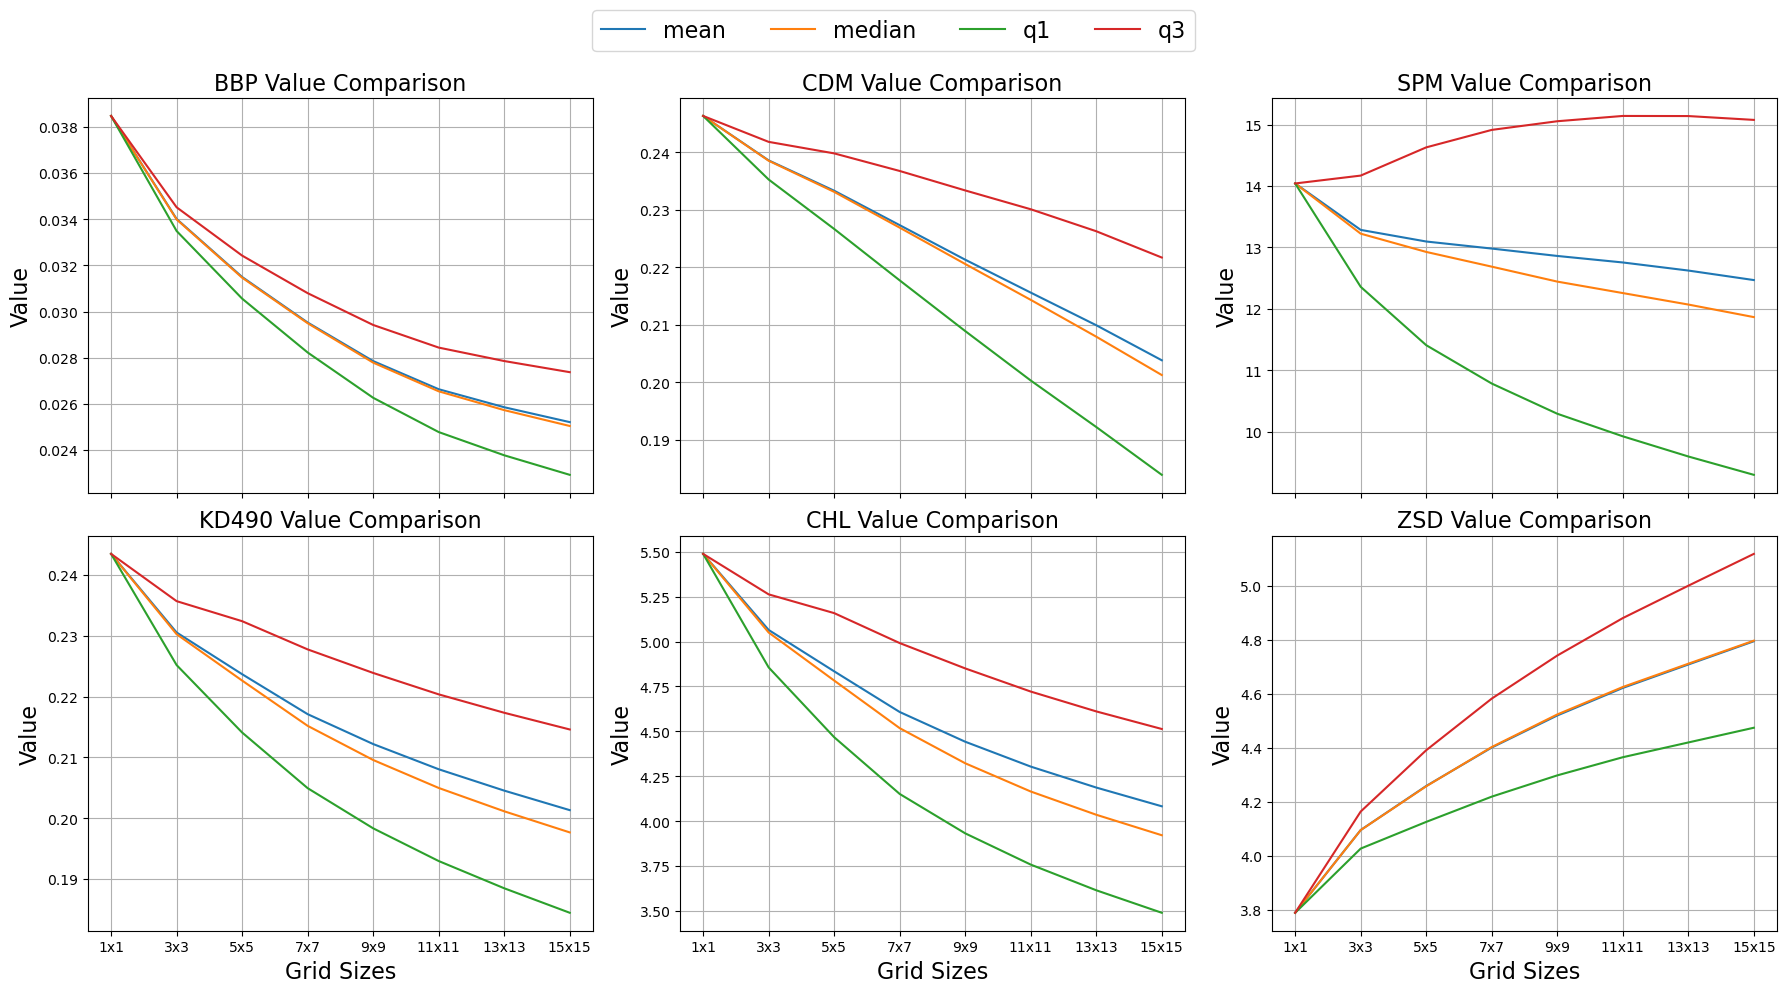

In [35]:
features = ['BBP', 'CDM', 'SPM', 'KD490', 'CHL', 'ZSD']
sizes = ['1x1', '3x3', '5x5', '7x7', '9x9', '11x11', '13x13', '15x15']
statistics = ['mean', 'median', 'q1', 'q3']

fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharex=True)

for ax, feature in zip(axs.ravel(), features):
    
    for statistic in statistics:
        columns = [f'{feature}_{res}_{statistic}' for res in sizes]
        feature_na[columns].mean().plot(ax=ax, label=statistic) 
        
    ax.set_title(f'{feature} Value Comparison', fontsize=16)
    ax.set_xticks(range(len(sizes)))
    ax.set_xticklabels(sizes, rotation=0)
    ax.set_ylabel('Value', fontsize=16)
    ax.set_xlabel('Grid Sizes', fontsize=16)
    ax.grid(True)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, statistics, ncol=4, loc='upper center', fontsize=16)  

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### Feature Dataset filled with Neg

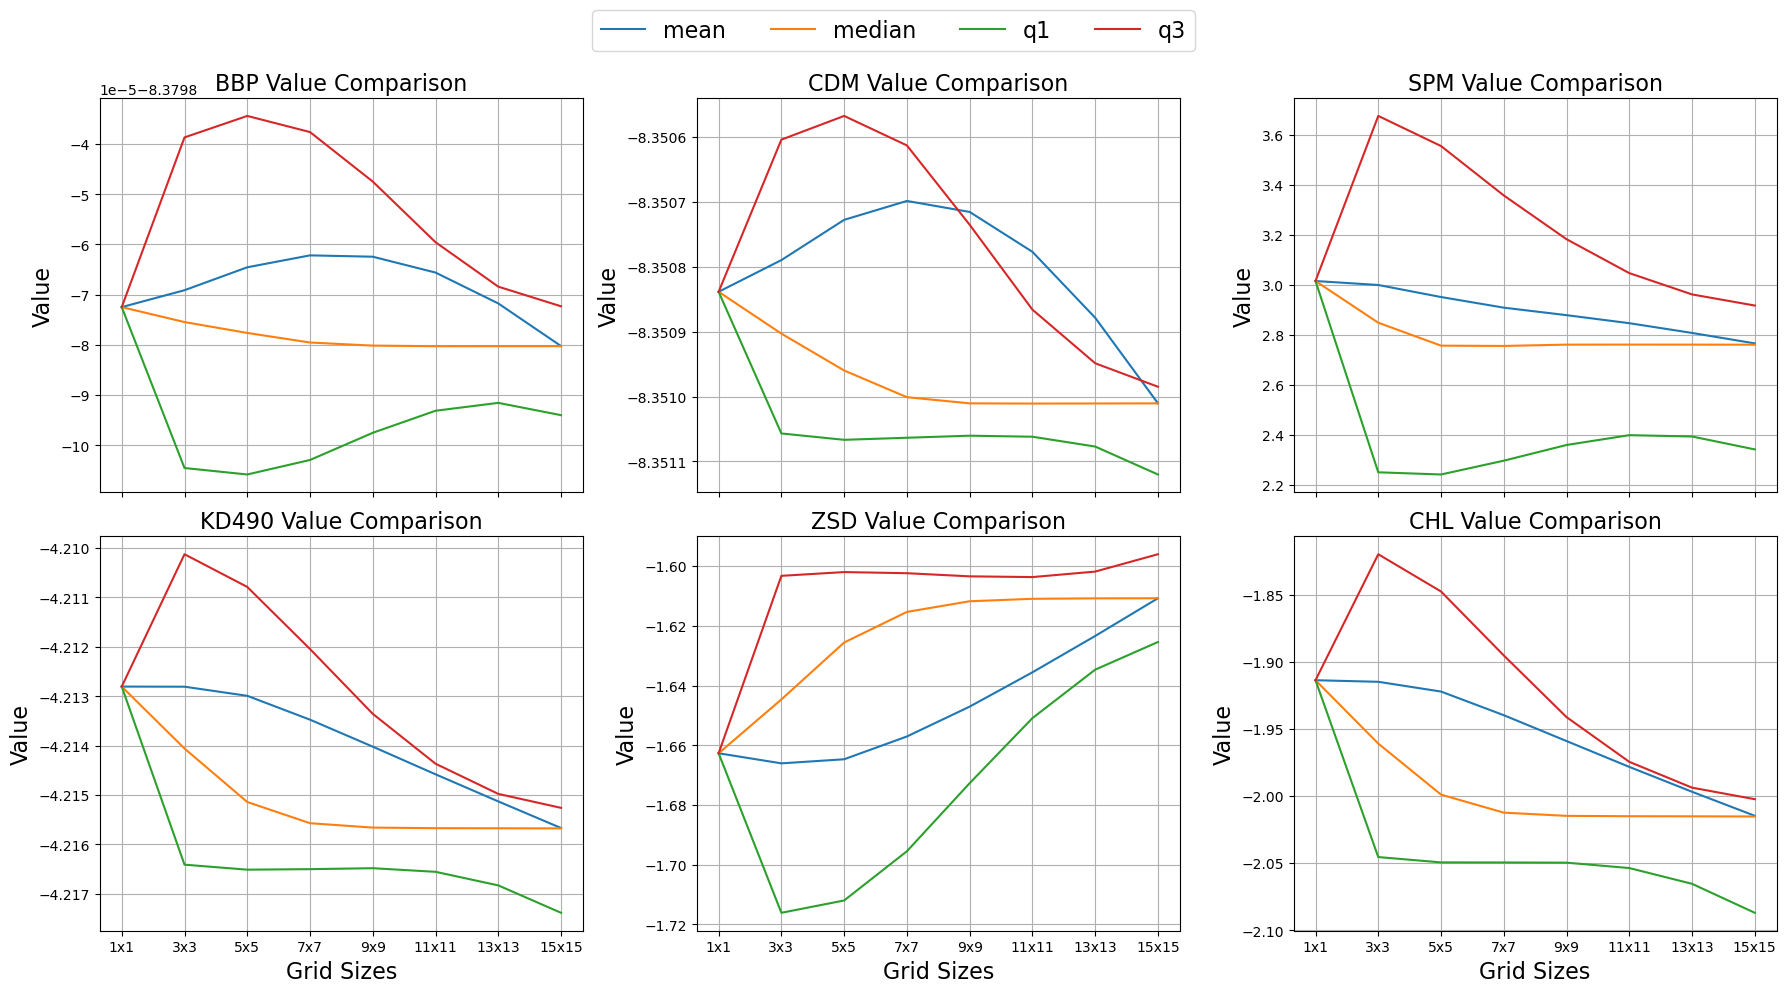

In [27]:
features = ['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']
sizes = ['1x1', '3x3', '5x5', '7x7', '9x9', '11x11', '13x13', '15x15']
statistics = ['mean', 'median', 'q1', 'q3']

fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharex=True)

for ax, feature in zip(axs.ravel(), features):
    
    for statistic in statistics:
        columns = [f'{feature}_{res}_{statistic}' for res in sizes]
        feature_neg[columns].mean().plot(ax=ax, label=statistic) 
        
    ax.set_title(f'{feature} Value Comparison', fontsize=16)
    ax.set_xticks(range(len(sizes)))
    ax.set_xticklabels(sizes, rotation=0)
    ax.set_ylabel('Value', fontsize=16)
    ax.set_xlabel('Grid Sizes', fontsize=16)
    ax.grid(True)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, statistics, ncol=4, loc='upper center', fontsize=16)  

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [6]:
data = []

for col in feature_neg.columns:
    if col not in ['time', 'site']:
        feat, size_stat = col.split('_')[0], '_'.join(col.split('_')[1:])
        size, statistic = size_stat.split('_')[0], '_'.join(size_stat.split('_')[1:])
        
        mean_value = feature_neg[col].mean()

        data.append([feat, size, statistic, mean_value])

feature_mean_neg = pd.DataFrame(data, columns=['feature', 'size', 'statistics', 'mean'])
feature_mean_neg

feature   size statistics      mean
0       BBP    1x1     median -8.379872
1       CDM    1x1     median -8.350839
2       SPM    1x1     median  3.014654
3     KD490    1x1     median -4.212805
4       ZSD    1x1     median -1.662674
..      ...    ...        ...       ...
187     CDM  15x15         q3 -8.350985
188     SPM  15x15         q3  2.916493
189   KD490  15x15         q3 -4.215261
190     ZSD  15x15         q3 -1.596026
191     CHL  15x15         q3 -2.002372

[192 rows x 4 columns]

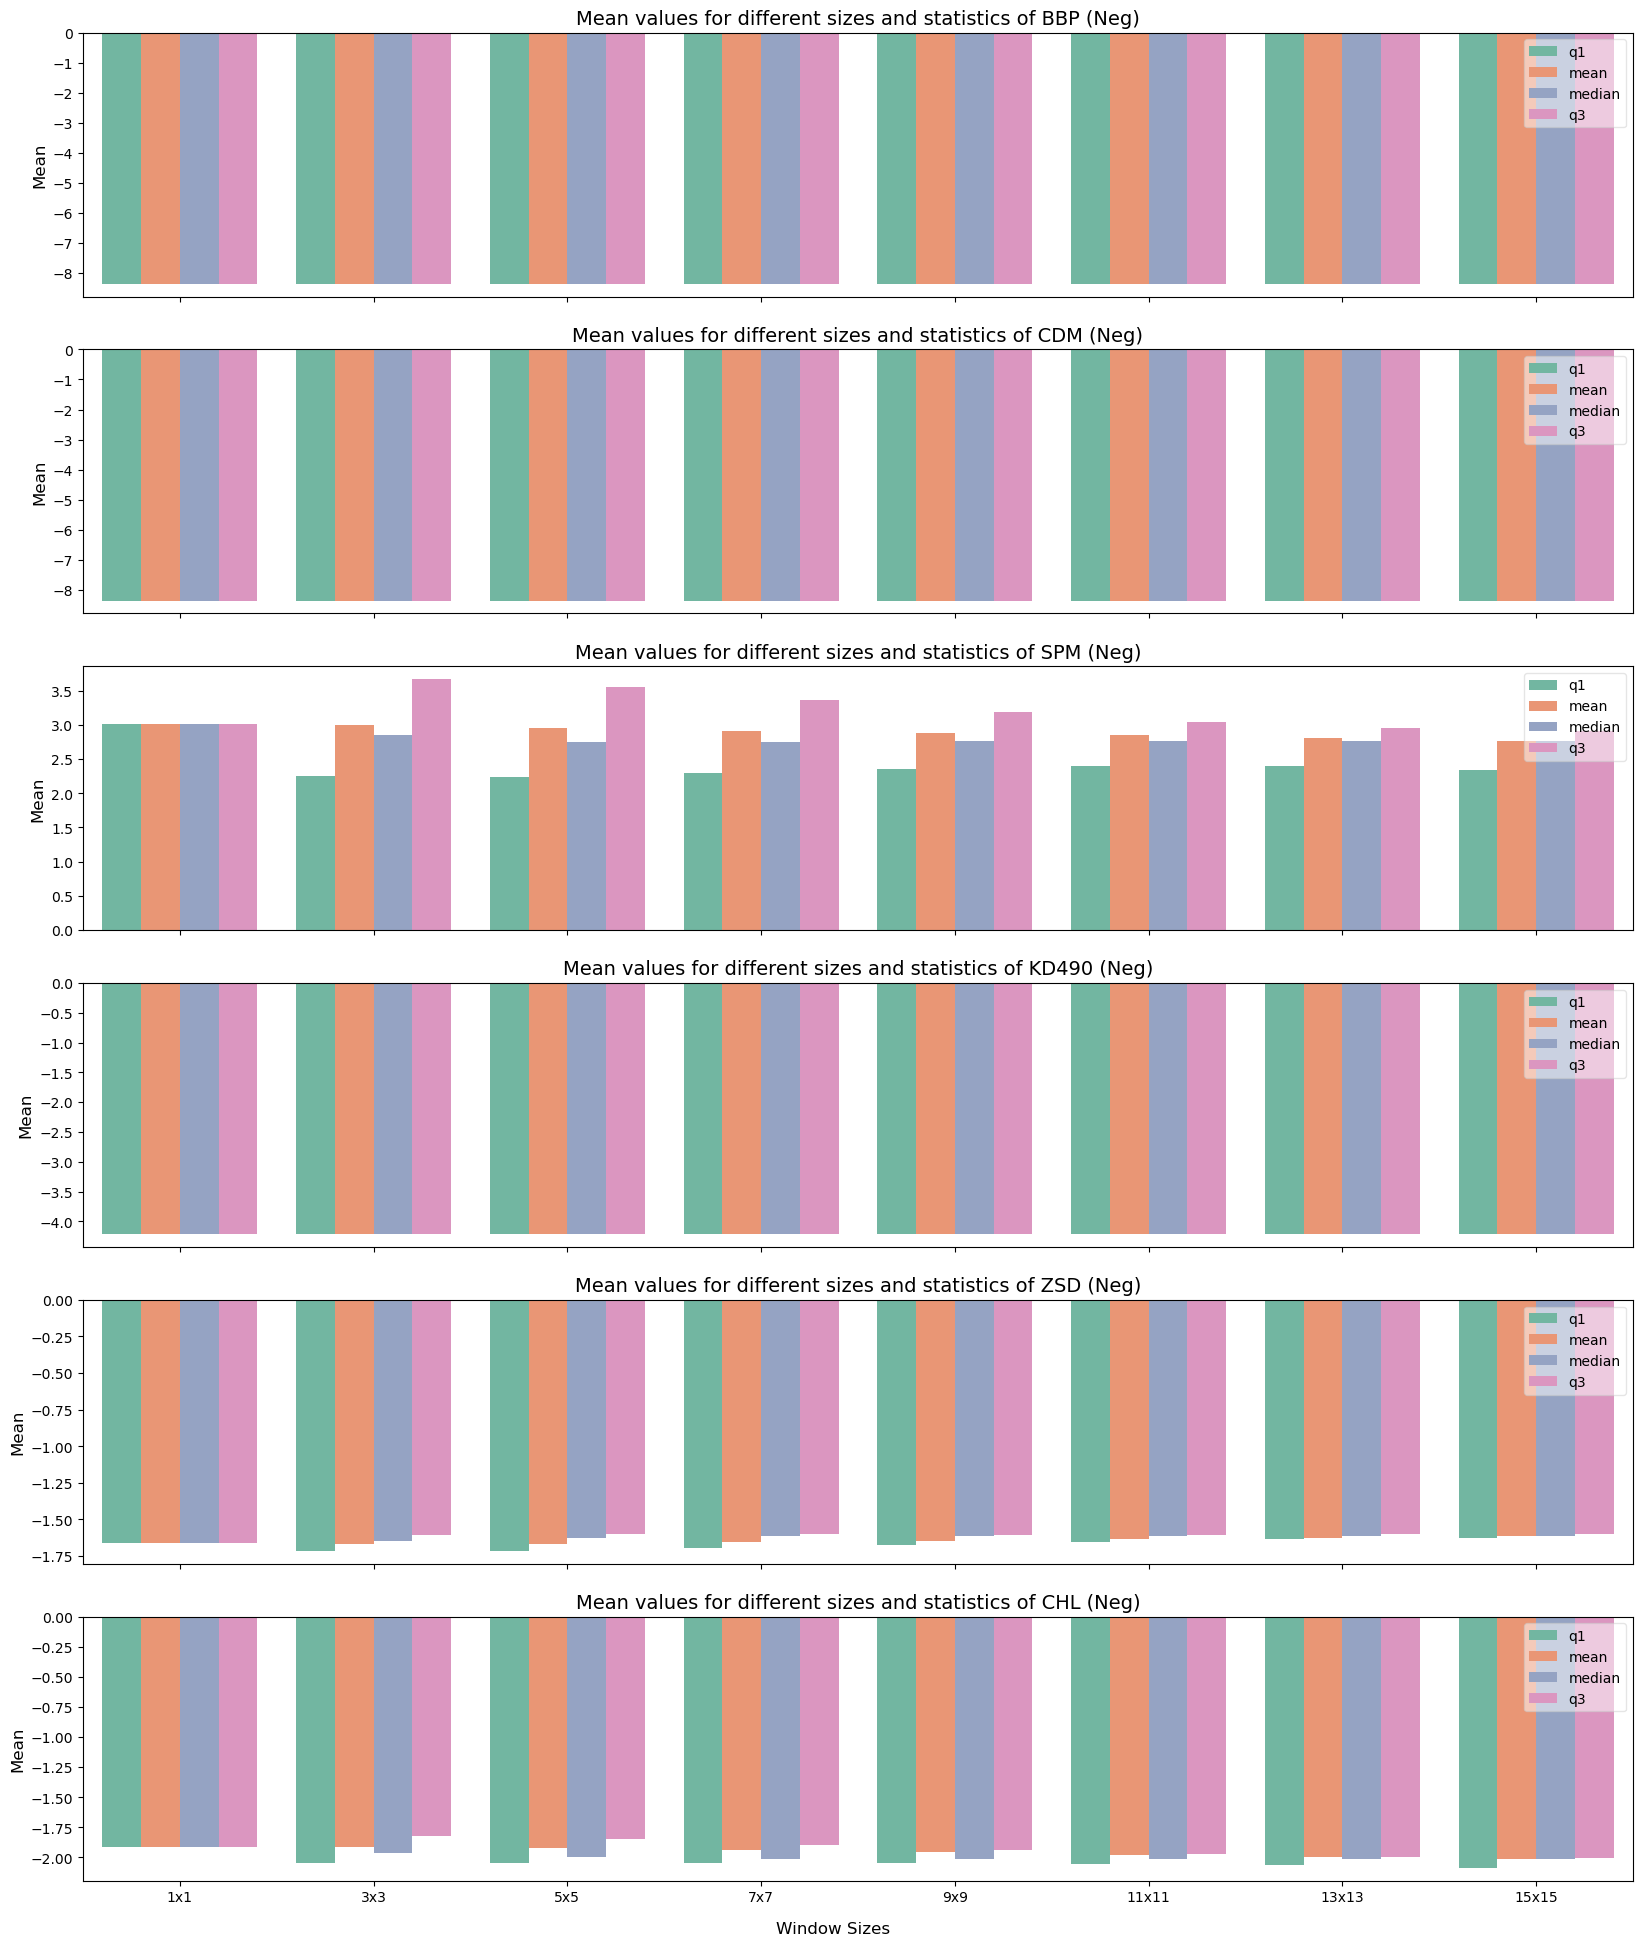

In [7]:
features = feature_mean_neg['feature'].unique()
feature_mean_neg['size_num'] = feature_mean_neg['size'].apply(lambda size_str: int(size_str.split('x')[0]))

sns.set_palette("Set2")

fig, axs = plt.subplots(len(features), 1, figsize=(20, 4 * len(features)), sharex=True)

for idx, feat in enumerate(features):
    feat_data = feature_mean_neg[feature_mean_neg['feature'] == feat].sort_values('size_num')

    sns.barplot(x='size', y='mean', hue='statistics', data=feat_data, ax=axs[idx],
                hue_order=['q1', 'mean', 'median', 'q3'])

    axs[idx].set_title(f'Mean values for different sizes and statistics of {feat} (Neg)', fontsize=14)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('Mean', fontsize=12)
    axs[idx].legend(loc='upper right',framealpha=0.5)

fig.text(0.5, 0.09, 'Window Sizes', ha='center', va='center', fontsize=12)

plt.show()

### Feature Dataset filled with Zero

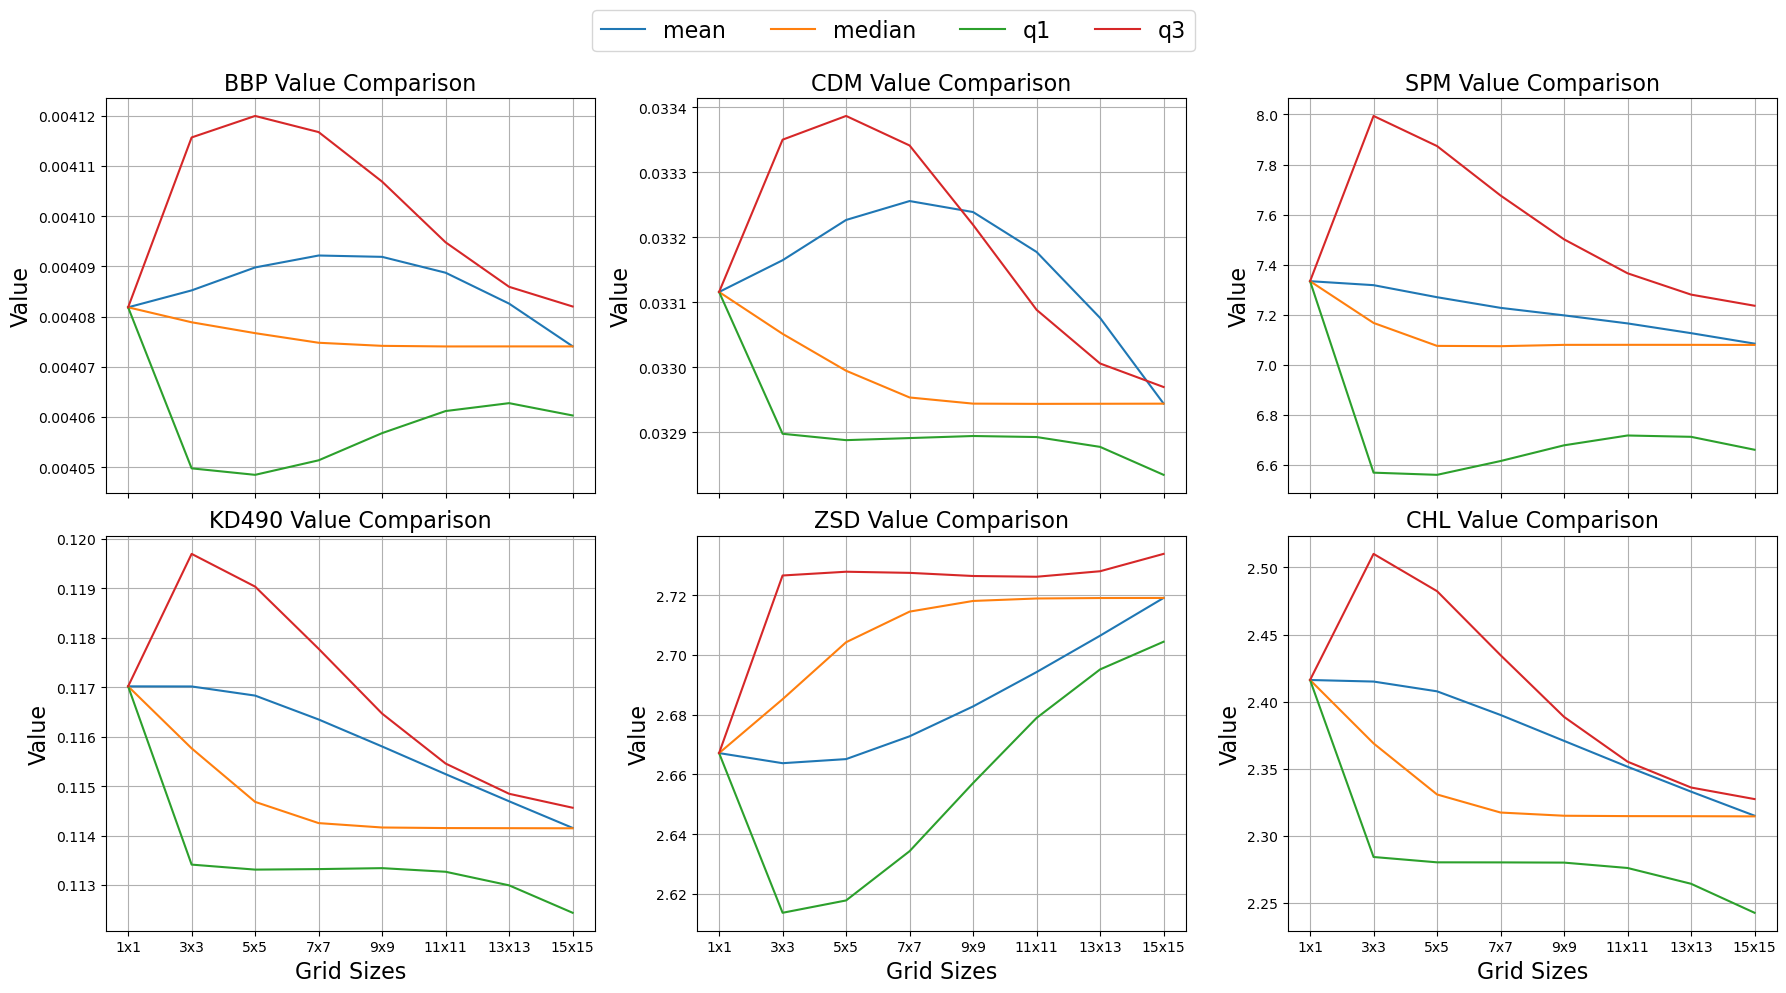

In [28]:
features = ['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']
sizes = ['1x1', '3x3', '5x5', '7x7', '9x9', '11x11', '13x13', '15x15']
statistics = ['mean', 'median', 'q1', 'q3']

fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharex=True)

for ax, feature in zip(axs.ravel(), features):
    
    for statistic in statistics:
        columns = [f'{feature}_{res}_{statistic}' for res in sizes]
        feature_zero[columns].mean().plot(ax=ax, label=statistic) 
        
    ax.set_title(f'{feature} Value Comparison', fontsize=16)
    ax.set_xticks(range(len(sizes)))
    ax.set_xticklabels(sizes, rotation=0)
    ax.set_ylabel('Value', fontsize=16)
    ax.set_xlabel('Grid Sizes', fontsize=16)
    ax.grid(True)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, statistics, ncol=4, loc='upper center', fontsize=16)  

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [9]:
data = []

for col in feature_zero.columns:
    if col not in ['time', 'site']:
        feat, size_stat = col.split('_')[0], '_'.join(col.split('_')[1:])
        size, statistic = size_stat.split('_')[0], '_'.join(size_stat.split('_')[1:])
        
        mean_value = feature_zero[col].mean()

        data.append([feat, size, statistic, mean_value])

feature_mean_zero = pd.DataFrame(data, columns=['feature', 'size', 'statistics', 'mean'])
feature_mean_zero

feature   size statistics      mean
0       BBP    1x1     median  0.004082
1       CDM    1x1     median  0.033116
2       SPM    1x1     median  7.333551
3     KD490    1x1     median  0.117020
4       ZSD    1x1     median  2.667152
..      ...    ...        ...       ...
187     CDM  15x15         q3  0.032970
188     SPM  15x15         q3  7.235390
189   KD490  15x15         q3  0.114564
190     ZSD  15x15         q3  2.733800
191     CHL  15x15         q3  2.327453

[192 rows x 4 columns]

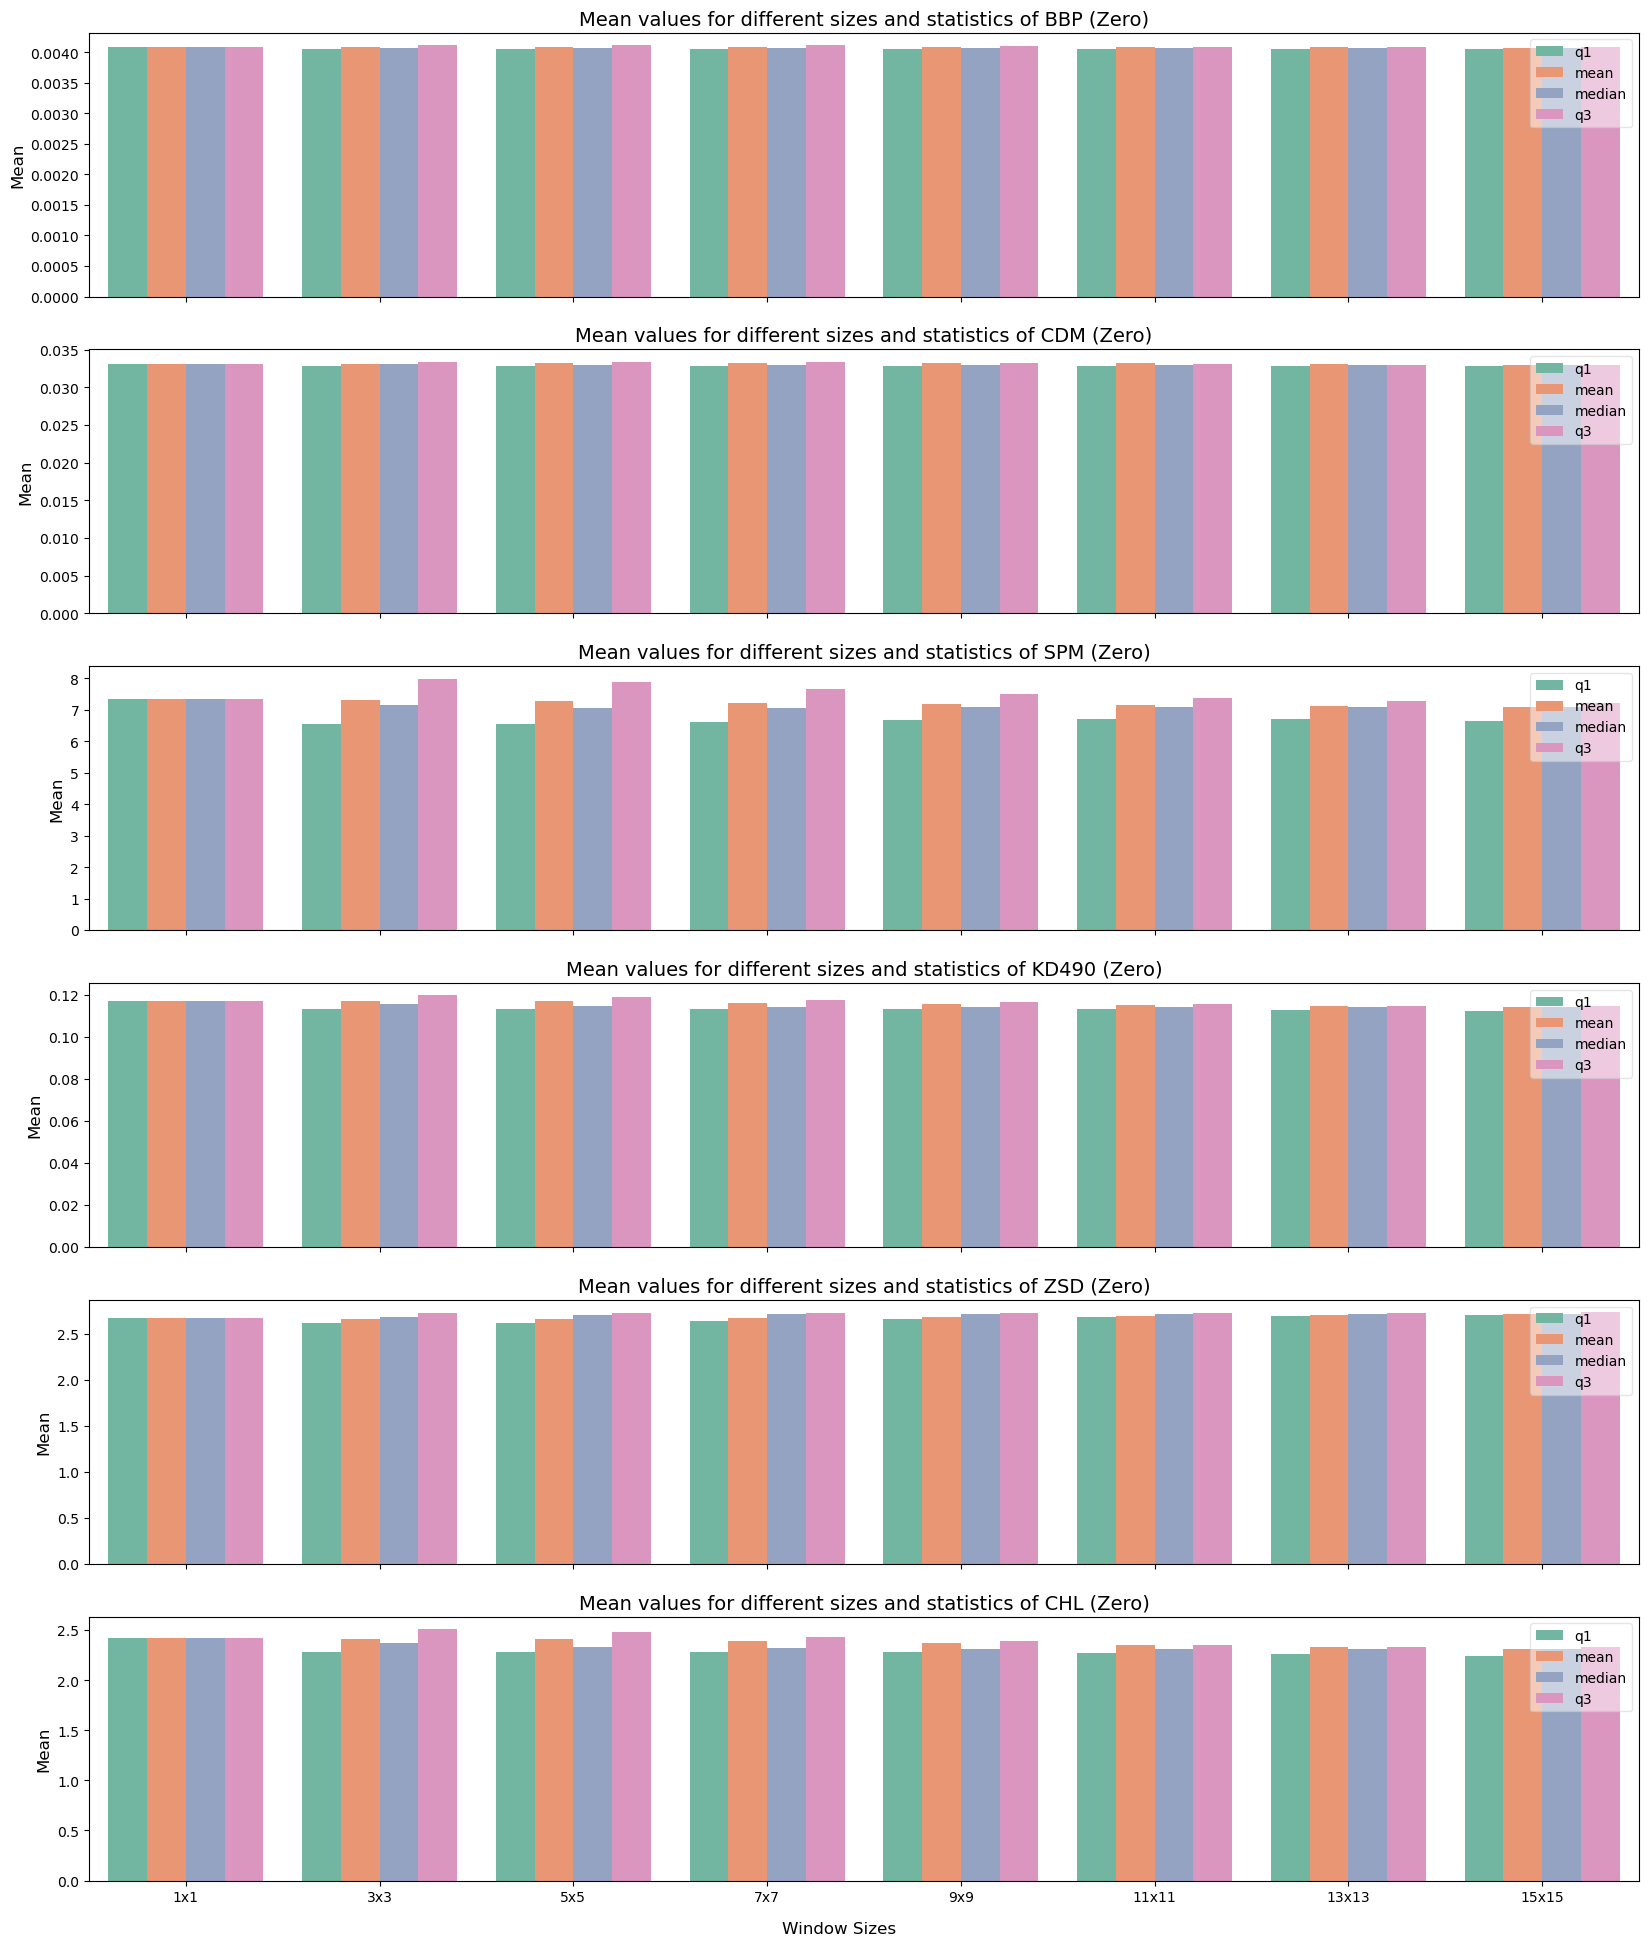

In [10]:
features = feature_mean_zero['feature'].unique()
feature_mean_zero['size_num'] = feature_mean_zero['size'].apply(lambda size_str: int(size_str.split('x')[0]))

sns.set_palette("Set2")

fig, axs = plt.subplots(len(features), 1, figsize=(20, 4 * len(features)), sharex=True)

for idx, feat in enumerate(features):
    feat_data = feature_mean_zero[feature_mean_zero['feature'] == feat].sort_values('size_num')

    sns.barplot(x='size', y='mean', hue='statistics', data=feat_data, ax=axs[idx],
                hue_order=['q1', 'mean', 'median', 'q3'])

    axs[idx].set_title(f'Mean values for different sizes and statistics of {feat} (Zero)', fontsize=14)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('Mean', fontsize=12)
    axs[idx].legend(loc='upper right',framealpha=0.5)

fig.text(0.5, 0.09, 'Window Sizes', ha='center', va='center', fontsize=12)

plt.show()

# RiskLevelLabel vs. 6 Features

#### Feature Dataset without filling Missing Value

In [9]:
df = pd.merge(riskforecasting, feature_na, on=['site','time'])
df

site        time  riskLevelLabel  BBP_1x1_median  \
0       ukc1101-06000  2020-05-14             0.0             NaN   
1       ukc1101-06000  2020-05-15             0.0             NaN   
2       ukc1101-06000  2020-05-16             0.0             NaN   
3       ukc1101-06000  2020-05-17             0.0             NaN   
4       ukc1101-06000  2020-05-18             0.0             NaN   
...               ...         ...             ...             ...   
187107  ukk4307-33900  2022-09-26             0.0             NaN   
187108  ukk4307-33900  2022-09-27             0.0             NaN   
187109  ukk4307-33900  2022-09-28             0.0             NaN   
187110  ukk4307-33900  2022-09-29             0.0             NaN   
187111  ukk4307-33900  2022-09-30             0.0             NaN   

        CDM_1x1_median  SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  \
0                  NaN        9.016005               NaN             NaN   
1                  NaN             NaN               NaN             NaN   
2                  NaN             NaN               NaN             NaN   
3                  NaN             NaN               NaN             NaN   
4                  NaN             NaN               NaN             NaN   
...                ...             ...               ...             ...   
187107             NaN             NaN               NaN             NaN   
187108             NaN             NaN               NaN             NaN   
187109             NaN             NaN               NaN             NaN   
187110             NaN             NaN               NaN             NaN   
187111             NaN             NaN               NaN             NaN   

        CHL_1x1_median  BBP_1x1_mean  ...  SPM_15x15_q1  KD490_15x15_q1  \
0                  NaN           NaN  ...      4.633350        0.658758   
1                  NaN           NaN  ...      8.102808        0.389522   
2                  NaN           NaN  ...      0.951647        0.255377   
3                  NaN           NaN  ...           NaN             NaN   
4                  NaN           NaN  ...           NaN             NaN   
...                ...           ...  ...           ...             ...   
187107             NaN           NaN  ...      5.116745        0.182074   
187108             NaN           NaN  ...           NaN             NaN   
187109             NaN           NaN  ...      4.906127        0.142193   
187110             NaN           NaN  ...      7.659460        0.148248   
187111             NaN           NaN  ...           NaN             NaN   

        ZSD_15x15_q1  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
0           1.337249     23.402420      0.014399      0.648437      6.829493   
1           1.773775     10.416777           NaN           NaN      8.102808   
2           2.511375      5.363088           NaN           NaN      1.347192   
3                NaN           NaN           NaN           NaN           NaN   
4                NaN           NaN           NaN           NaN           NaN   
...              ...           ...           ...           ...           ...   
187107      3.801842      3.106306           NaN           NaN      7.625628   
187108           NaN           NaN           NaN           NaN           NaN   
187109      5.212851      2.060148           NaN           NaN      4.906127   
187110      4.761873      2.209768           NaN           NaN     11.234165   
187111           NaN           NaN           NaN           NaN           NaN   

        KD490_15x15_q3  ZSD_15x15_q3  CHL_15x15_q3  
0             0.782075      1.376949     30.399586  
1             0.394867      1.792657     10.639543  
2             0.270816      2.670747      5.887294  
3                  NaN           NaN           NaN  
4                  NaN           NaN           NaN  
...                ...           ...           ...  
187107        0.186561      3.910818      

In [59]:
correlations = df.corr()['riskLevelLabel']

# For features
features = ['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']
highest_feature_correlations = {}

for feature in features:
    feature_correlations = {key: correlations[key] for key in correlations.keys() if feature in key}
    max_correlation_key = max(feature_correlations, key=lambda k: abs(feature_correlations[k]))
    highest_feature_correlations[feature] = (max_correlation_key, feature_correlations[max_correlation_key])


# For grid sizes
grid_sizes = [f"{i}x{i}" for i in range(1, 16, 2)]
highest_grid_correlations = {}

for grid in grid_sizes:
    grid_correlations = {key: correlations[key] for key in correlations.keys() if grid in key}
    max_correlation_key = max(grid_correlations, key=lambda k: abs(grid_correlations[k]))
    highest_grid_correlations[grid] = (max_correlation_key, grid_correlations[max_correlation_key])

/var/folders/r5/x64ktbgx58365__7s6m8nvqh0000gn/T/ipykernel_1313/2261963275.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['riskLevelLabel']


In [62]:
highest_feature_correlations

{'BBP': ('BBP_7x7_median', 0.03570957401702285),
 'CDM': ('CDM_1x1_median', -0.028824792376234212),
 'SPM': ('SPM_1x1_median', 0.06684016462875776),
 'KD490': ('KD490_15x15_q1', 0.013537296229456272),
 'ZSD': ('ZSD_15x15_q3', -0.011568341544003132),
 'CHL': ('CHL_5x5_q3', -0.012248916528221356)}

In [63]:
highest_grid_correlations

{'1x1': ('SPM_1x1_median', 0.06684016462875776),
 '3x3': ('SPM_3x3_q3', 0.056730684634054486),
 '5x5': ('SPM_5x5_mean', 0.05826415683282747),
 '7x7': ('SPM_7x7_q3', 0.05872178750712021),
 '9x9': ('SPM_9x9_q3', 0.0571658022684985),
 '11x11': ('SPM_11x11_q3', 0.05534619111923884),
 '13x13': ('SPM_13x13_q3', 0.0530032954662795),
 '15x15': ('SPM_15x15_q3', 0.05224649049670442)}

In [47]:
df_corr_pearson.sort_values('riskLevelLabel',key=abs,ascending=False).head(11)

riskLevelLabel  BBP_1x1_median  CDM_1x1_median  \
riskLevelLabel        1.000000        0.023234       -0.028825   
SPM_1x1_median        0.066840        0.644808        0.251321   
SPM_1x1_q1            0.066840        0.644808        0.251321   
SPM_1x1_q3            0.066840        0.644808        0.251321   
SPM_1x1_mean          0.066840        0.644808        0.251321   
SPM_7x7_q3            0.058722        0.703981        0.284446   
SPM_7x7_mean          0.058327        0.712484        0.287693   
SPM_5x5_mean          0.058264        0.682977        0.272142   
SPM_5x5_q3            0.057835        0.678895        0.271917   
SPM_7x7_median        0.057507        0.693876        0.270849   
SPM_5x5_median        0.057288        0.677621        0.265689   

                SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  \
riskLevelLabel        0.066840         -0.000384       -0.008368   
SPM_1x1_median        1.000000          0.147231       -0.234277   
SPM_1x1_q1            1.000000          0.147231       -0.234277   
SPM_1x1_q3            1.000000          0.147231       -0.234277   
SPM_1x1_mean          1.000000          0.147231       -0.234277   
SPM_7x7_q3            0.941113          0.163275       -0.254591   
SPM_7x7_mean          0.944809          0.160543       -0.253319   
SPM_5x5_mean          0.968988          0.158470       -0.247287   
SPM_5x5_q3            0.964620          0.160869       -0.248568   
SPM_7x7_median        0.938803          0.153232       -0.242683   
SPM_5x5_median        0.966787          0.154584       -0.241213   

                CHL_1x1_median  BBP_1x1_mean  CDM_1x1_mean  SPM_1x1_mean  ...  \
riskLevelLabel       -0.005257      0.023234     -0.028825      0.066840  ...   
SPM_1x1_median        0.097722      0.644808      0.251321      1.000000  ...   
SPM_1x1_q1            0.097722      0.644808      0.251321      1.000000  ...   
SPM_1x1_q3            0.097722      0.644808      0.251321      1.000000  ...   
SPM_1x1_mean          0.097722      0.644808      0.251321      1.000000  ...   
SPM_7x7_q3            0.108446      0.703981      0.284446      0.941113  ...   
SPM_7x7_mean          0.105704      0.712484      0.287693      0.944809  ...   
SPM_5x5_mean          0.105458      0.682977      0.272142      0.968988  ...   
SPM_5x5_q3            0.107736      0.678895      0.271917      0.964620  ...   
SPM_7x7_median        0.100586      0.693876      0.270849      0.938803  ...   
SPM_5x5_median        0.102861      0.677621      0.265689      0.966787  ...   

                SPM_15x15_q1  KD490_15x15_q1  ZSD_15x15_q1  CHL_15x15_q1  \
riskLevelLabel      0.044435        0.013537     -0.002382      0.010493   
SPM_1x1_median      0.832782        0.316486     -0.259173      0.277542   
SPM_1x1_q1          0.832782        0.316486     -0.259173      0.277542   
SPM_1x1_q3          0.832782        0.316486     -0.259173      0.277542   
SPM_1x1_mean        0.832782        0.316486     -0.259173      0.277542   
SPM_7x7_q3          0.885204        0.385411     -0.302187      0.343727   
SPM_7x7_mean        0.919763        0.383749     -0.300511      0.342193   
SPM_5x5_mean        0.895074        0.371422     -0.291849      0.330346   
SPM_5x5_q3          0.868810        0.372345     -0.293440      0.331168   
SPM_7x7_median      0.915903        0.371882     -0.289975      0.331596   
SPM_5x5_median      0.890576        0.363981     -0.285214      0.323709   

                BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  KD490_15x15_q3  \
riskLevelLabel      0.030468     -0.005227      0.052246       -0.003199   
SPM_1x1_median      0.618269      0.215140      0.854747        0.214475   
SPM_1x1_q1          0.618269      0.215140      0.854747        0.214475   
SPM_1x1_q3          0.618269      0.215140      0.854747        0.214475   
SPM_1x1_mean        0.618269      0.215140      0.854747        0.214475   
SPM_7x7_q3          0.673902      0.264787      0.940514        

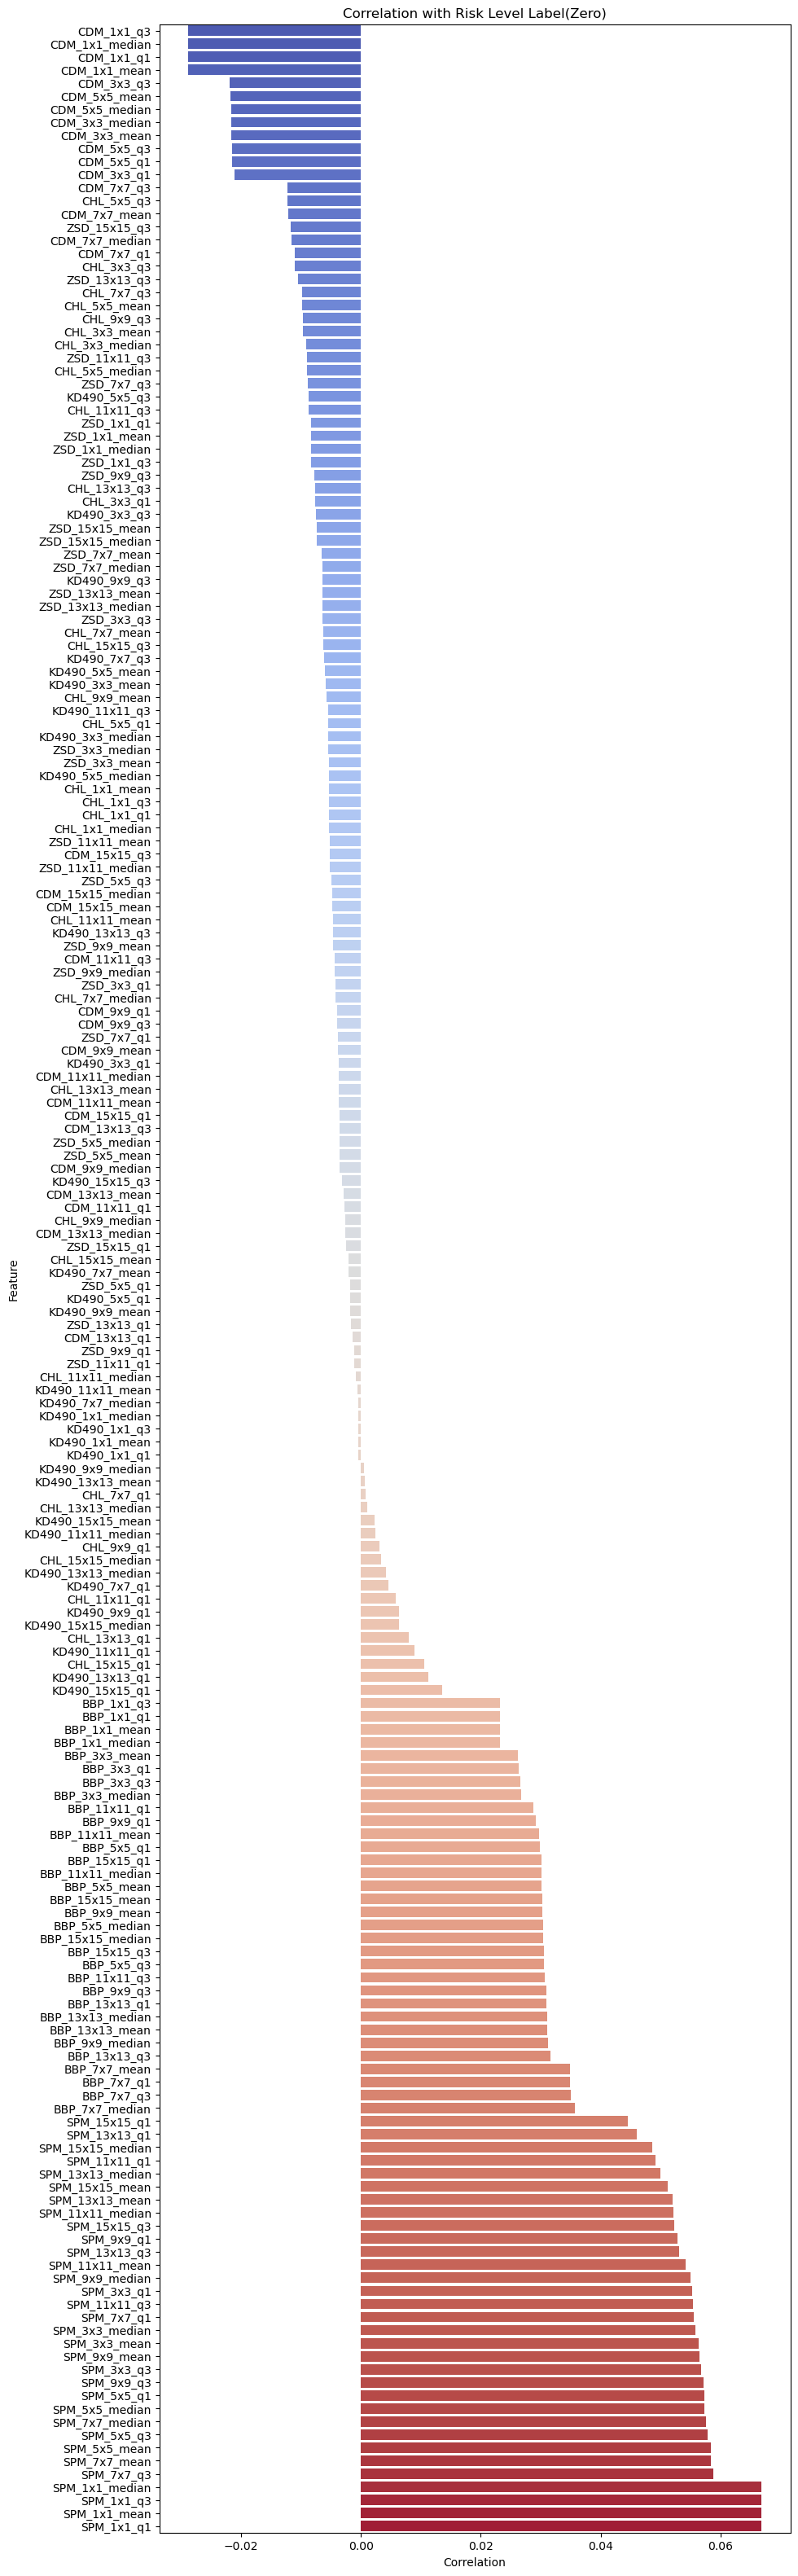

In [37]:
correlation_df = df.drop(columns=['riskLevelLabel', 'time', 'site']).corrwith(df['riskLevelLabel']).reset_index()
correlation_df.columns = ['Feature', 'Correlation']
correlation_df = correlation_df.sort_values(by='Correlation', ascending=True)

plt.figure(figsize=(10, 40))
sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='coolwarm')
plt.title('Correlation with Risk Level Label')
plt.show()

#### Feature Dataset filled with Neg

In [10]:
df_neg = pd.merge(riskforecasting, feature_neg, on=['site','time'])
df_neg

site        time  riskLevelLabel  BBP_1x1_median  \
0       ukc1101-06000  2020-05-14             0.0        0.014399   
1       ukc1101-06000  2020-05-15             0.0      -10.000000   
2       ukc1101-06000  2020-05-16             0.0      -10.000000   
3       ukc1101-06000  2020-05-17             0.0      -10.000000   
4       ukc1101-06000  2020-05-18             0.0      -10.000000   
...               ...         ...             ...             ...   
187107  ukk4307-33900  2022-09-26             0.0      -10.000000   
187108  ukk4307-33900  2022-09-27             0.0      -10.000000   
187109  ukk4307-33900  2022-09-28             0.0      -10.000000   
187110  ukk4307-33900  2022-09-29             0.0      -10.000000   
187111  ukk4307-33900  2022-09-30             0.0      -10.000000   

        CDM_1x1_median  SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  \
0             0.648437        9.016005          0.720255        1.359252   
1           -10.000000        8.102808          0.393628        1.778462   
2           -10.000000        1.135922          0.263305        2.588783   
3           -10.000000      -10.000000        -10.000000      -10.000000   
4           -10.000000      -10.000000        -10.000000      -10.000000   
...                ...             ...               ...             ...   
187107      -10.000000        7.356489          0.183889        3.869243   
187108      -10.000000      -10.000000        -10.000000      -10.000000   
187109      -10.000000        4.906127          0.142344        5.219365   
187110      -10.000000        9.181858          0.151466        4.857575   
187111      -10.000000      -10.000000        -10.000000      -10.000000   

        CHL_1x1_median  BBP_1x1_mean  ...  SPM_15x15_q1  KD490_15x15_q1  \
0            26.936116      0.014399  ...      5.846387        0.720255   
1            10.588528    -10.000000  ...      8.102808        0.393628   
2             5.632908    -10.000000  ...      1.135922        0.263305   
3           -10.000000    -10.000000  ...    -10.000000      -10.000000   
4           -10.000000    -10.000000  ...    -10.000000      -10.000000   
...                ...           ...  ...           ...             ...   
187107        3.158081    -10.000000  ...      7.356489        0.183889   
187108      -10.000000    -10.000000  ...    -10.000000      -10.000000   
187109        2.063839    -10.000000  ...      4.906127        0.142344   
187110        2.291730    -10.000000  ...      9.181858        0.151466   
187111      -10.000000    -10.000000  ...    -10.000000      -10.000000   

        ZSD_15x15_q1  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
0           1.359252     26.936116      0.014399      0.648437      5.846387   
1           1.778462     10.588528    -10.000000    -10.000000      8.102808   
2           2.588783      5.632908    -10.000000    -10.000000      1.135922   
3         -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
4         -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
...              ...           ...           ...           ...           ...   
187107      3.869243      3.158081    -10.000000    -10.000000      7.356489   
187108    -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
187109      5.219365      2.063839    -10.000000    -10.000000      4.906127   
187110      4.857575      2.291730    -10.000000    -10.000000      9.181858   
187111    -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   

        KD490_15x15_q3  ZSD_15x15_q3  CHL_15x15_q3  
0             0.720255      1.359252     26.936116  
1             0.393628      1.778462     10.588528  
2             0.263305      2.588783      5.632908  
3           -10.000000    -10.000000    -10.000000  
4           -10.000000    -10.000000    -10.000000  
...                ...           ...           ...  
187107        0.183889      3.869243      

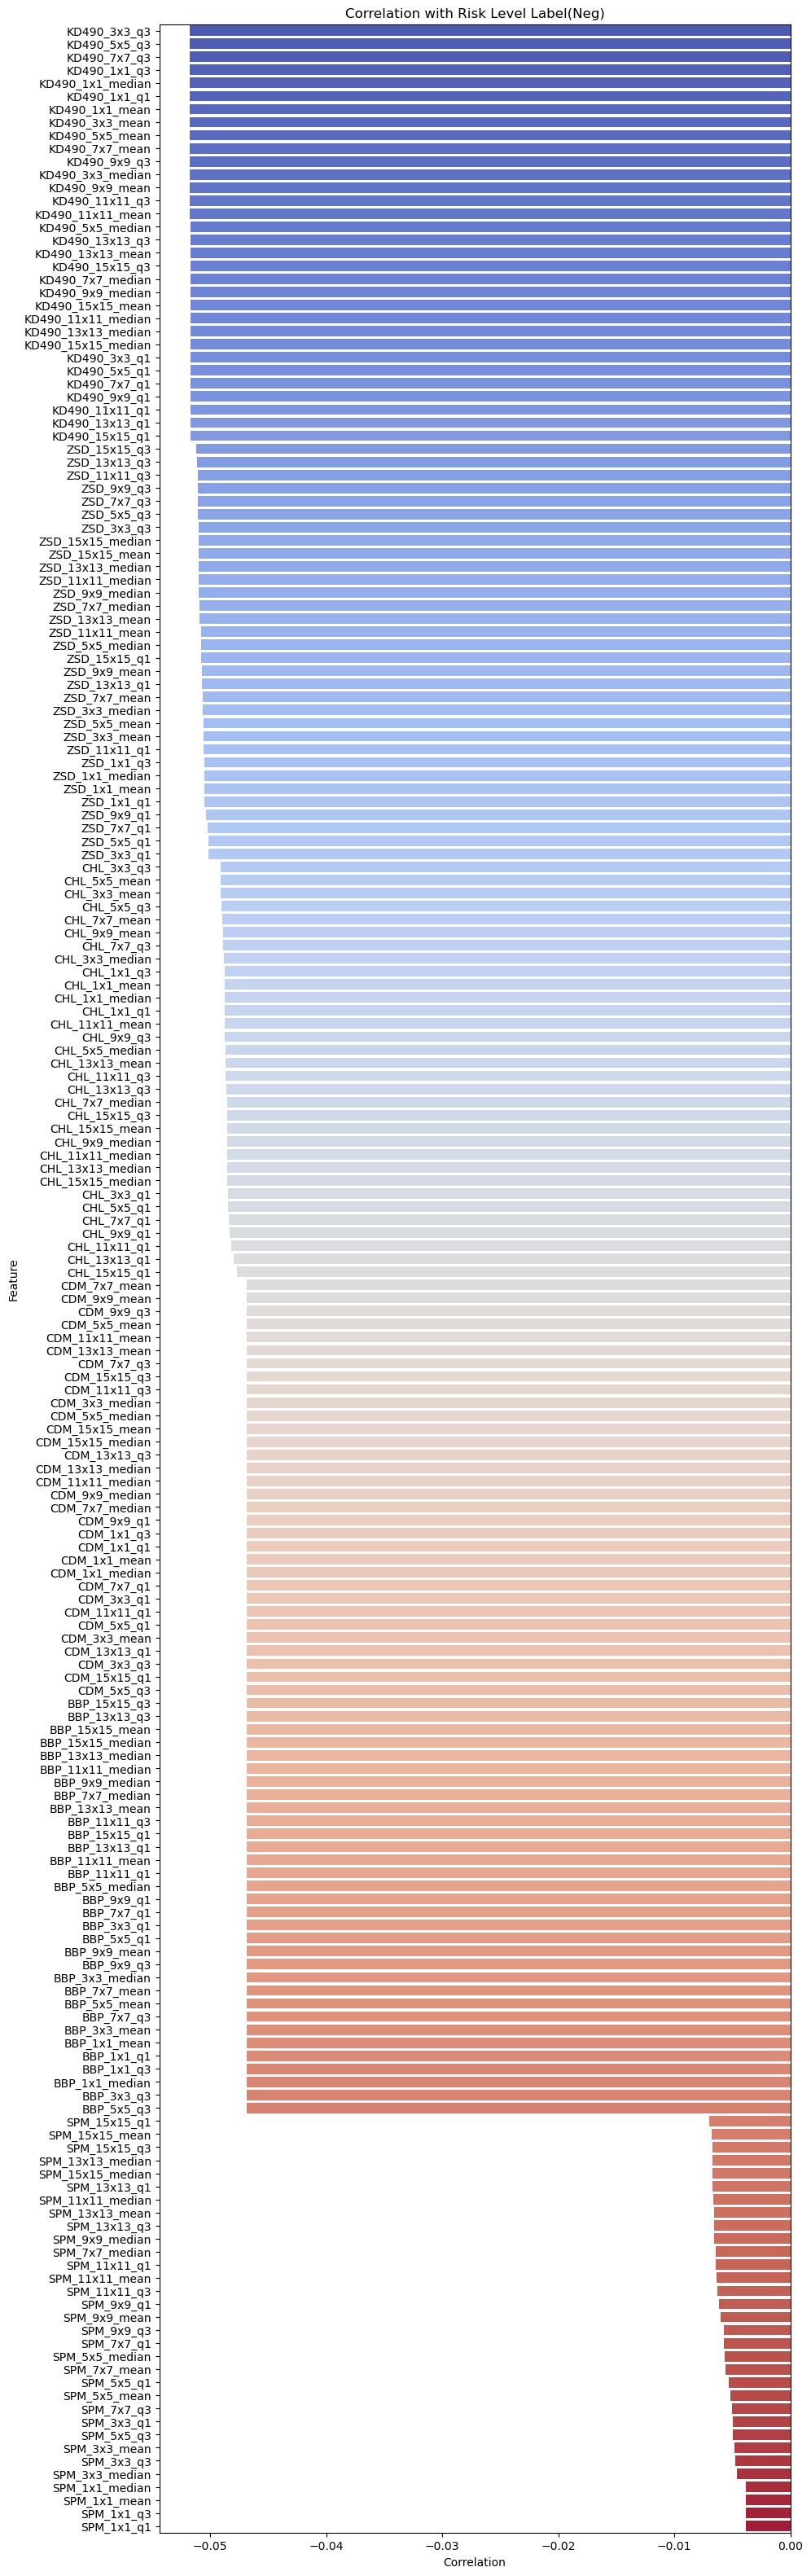

In [13]:
correlation_df_neg = df_neg.drop(columns=['riskLevelLabel', 'time', 'site']).corrwith(df_neg['riskLevelLabel']).reset_index()
correlation_df_neg.columns = ['Feature', 'Correlation']
correlation_df_neg = correlation_df_neg.sort_values(by='Correlation', ascending=True)

plt.figure(figsize=(10, 40))
sns.barplot(x='Correlation', y='Feature', data=correlation_df_neg, palette='coolwarm')
plt.title('Correlation with Risk Level Label(Neg)')
plt.show()

#### Feature Dataset filled with Zero

In [11]:
df_zero = pd.merge(riskforecasting, feature_zero, on=['site','time'])
df_zero

site        time  riskLevelLabel  BBP_1x1_median  \
0       ukc1101-06000  2020-05-14             0.0        0.014399   
1       ukc1101-06000  2020-05-15             0.0        0.000000   
2       ukc1101-06000  2020-05-16             0.0        0.000000   
3       ukc1101-06000  2020-05-17             0.0        0.000000   
4       ukc1101-06000  2020-05-18             0.0        0.000000   
...               ...         ...             ...             ...   
187107  ukk4307-33900  2022-09-26             0.0        0.000000   
187108  ukk4307-33900  2022-09-27             0.0        0.000000   
187109  ukk4307-33900  2022-09-28             0.0        0.000000   
187110  ukk4307-33900  2022-09-29             0.0        0.000000   
187111  ukk4307-33900  2022-09-30             0.0        0.000000   

        CDM_1x1_median  SPM_1x1_median  KD490_1x1_median  ZSD_1x1_median  \
0             0.648437        9.016005          0.720255        1.359252   
1             0.000000        8.102808          0.393628        1.778462   
2             0.000000        1.135922          0.263305        2.588783   
3             0.000000        0.000000          0.000000        0.000000   
4             0.000000        0.000000          0.000000        0.000000   
...                ...             ...               ...             ...   
187107        0.000000        7.356489          0.183889        3.869243   
187108        0.000000        0.000000          0.000000        0.000000   
187109        0.000000        4.906127          0.142344        5.219365   
187110        0.000000        9.181858          0.151466        4.857575   
187111        0.000000        0.000000          0.000000        0.000000   

        CHL_1x1_median  BBP_1x1_mean  ...  SPM_15x15_q1  KD490_15x15_q1  \
0            26.936116      0.014399  ...      5.846387        0.720255   
1            10.588528      0.000000  ...      8.102808        0.393628   
2             5.632908      0.000000  ...      1.135922        0.263305   
3             0.000000      0.000000  ...      0.000000        0.000000   
4             0.000000      0.000000  ...      0.000000        0.000000   
...                ...           ...  ...           ...             ...   
187107        3.158081      0.000000  ...      7.356489        0.183889   
187108        0.000000      0.000000  ...      0.000000        0.000000   
187109        2.063839      0.000000  ...      4.906127        0.142344   
187110        2.291730      0.000000  ...      9.181858        0.151466   
187111        0.000000      0.000000  ...      0.000000        0.000000   

        ZSD_15x15_q1  CHL_15x15_q1  BBP_15x15_q3  CDM_15x15_q3  SPM_15x15_q3  \
0           1.359252     26.936116      0.014399      0.648437      5.846387   
1           1.778462     10.588528      0.000000      0.000000      8.102808   
2           2.588783      5.632908      0.000000      0.000000      1.135922   
3           0.000000      0.000000      0.000000      0.000000      0.000000   
4           0.000000      0.000000      0.000000      0.000000      0.000000   
...              ...           ...           ...           ...           ...   
187107      3.869243      3.158081      0.000000      0.000000      7.356489   
187108      0.000000      0.000000      0.000000      0.000000      0.000000   
187109      5.219365      2.063839      0.000000      0.000000      4.906127   
187110      4.857575      2.291730      0.000000      0.000000      9.181858   
187111      0.000000      0.000000      0.000000      0.000000      0.000000   

        KD490_15x15_q3  ZSD_15x15_q3  CHL_15x15_q3  
0             0.720255      1.359252     26.936116  
1             0.393628      1.778462     10.588528  
2             0.263305      2.588783      5.632908  
3             0.000000      0.000000      0.000000  
4             0.000000      0.000000      0.000000  
...                ...           ...           ...  
187107        0.183889      3.869243      

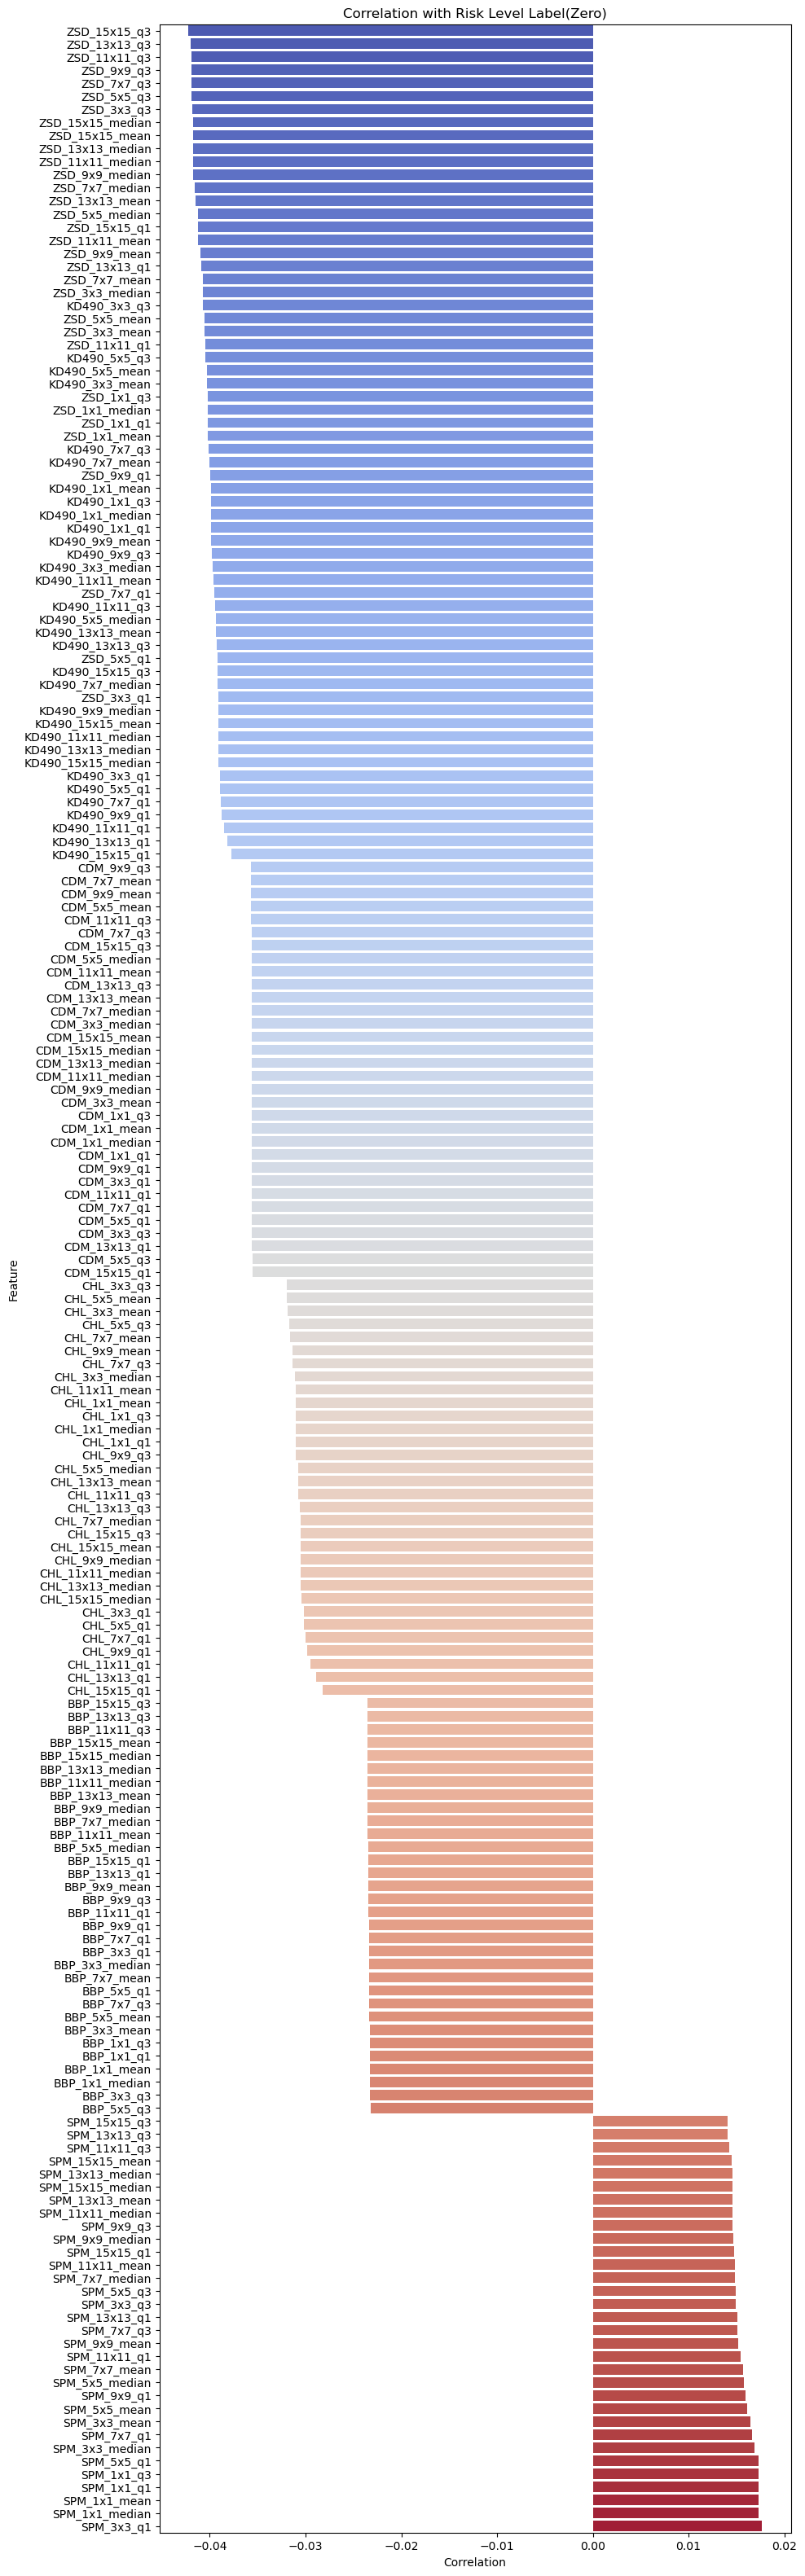

In [14]:
correlation_df_zero = df_zero.drop(columns=['riskLevelLabel', 'time', 'site']).corrwith(df_neg['riskLevelLabel']).reset_index()
correlation_df_zero.columns = ['Feature', 'Correlation']
correlation_df_zero = correlation_df_zero.sort_values(by='Correlation', ascending=True)

plt.figure(figsize=(10, 40))
sns.barplot(x='Correlation', y='Feature', data=correlation_df_zero, palette='coolwarm')
plt.title('Correlation with Risk Level Label(Zero)')
plt.show()

### 15x15 window sized mean

#### Feature Dataset without filling Missing Value

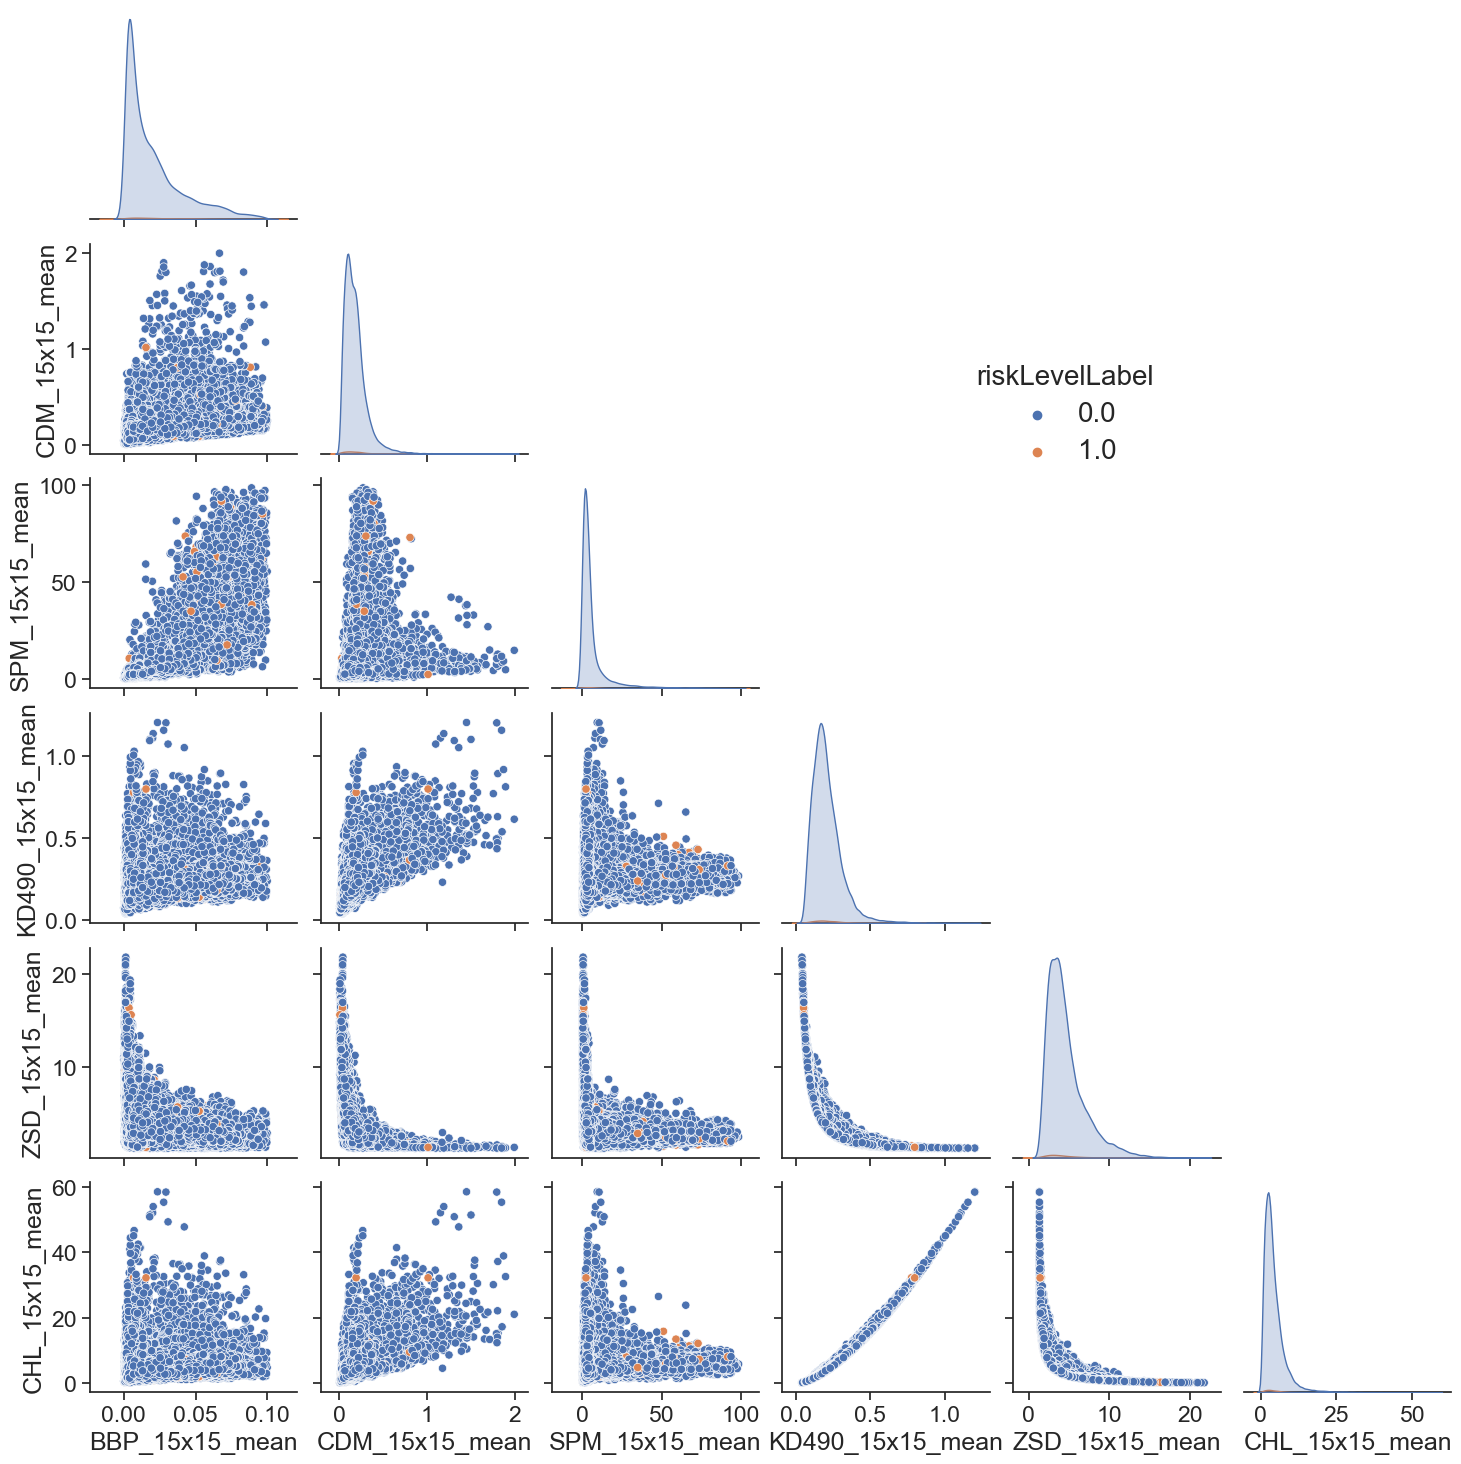

In [32]:
corr_columns_neg = ['riskLevelLabel'] + [col for col in df.columns if col.endswith('15x15_mean')]
subset_df = df[corr_columns_neg].dropna()

sns.set(font_scale=1.5, style='ticks')
g = sns.pairplot(subset_df, hue='riskLevelLabel', corner=True)

g._legend.set_bbox_to_anchor((0.7,0.7))
for text in g._legend.texts:
    text.set_fontsize(20)
g._legend.get_title().set_fontsize(20)

plt.show()

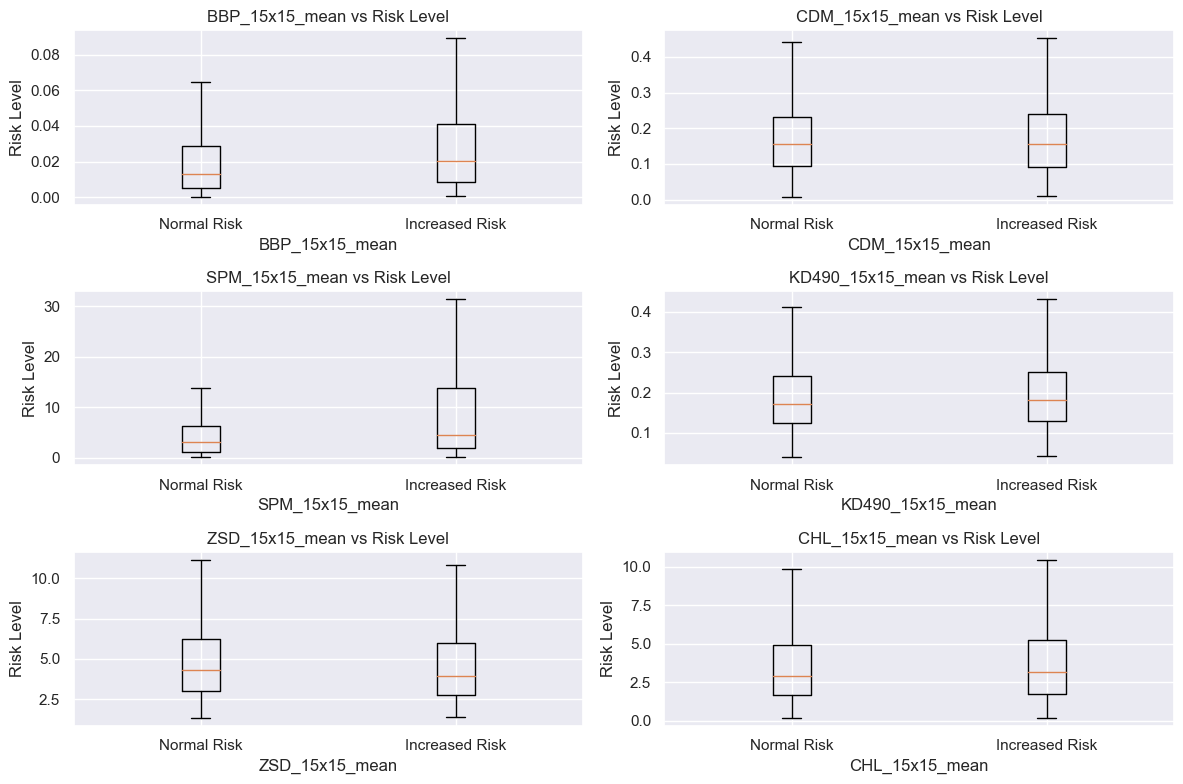

In [40]:
labels = [x for x in df.columns if '15x15_mean' in x]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
sns.set(font_scale=1)

for i, column in enumerate(labels):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    g = ax.boxplot([df.loc[df["riskLevelLabel"] == 0, labels[i]].dropna(),
                    df.loc[df["riskLevelLabel"] == 1, labels[i]].dropna()],
                    labels=["Normal Risk", "Increased Risk"], showfliers=False)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Risk Level")
    ax.set_title(f"{column} vs Risk Level")

plt.tight_layout()

#### Feature Dataset filled with Neg

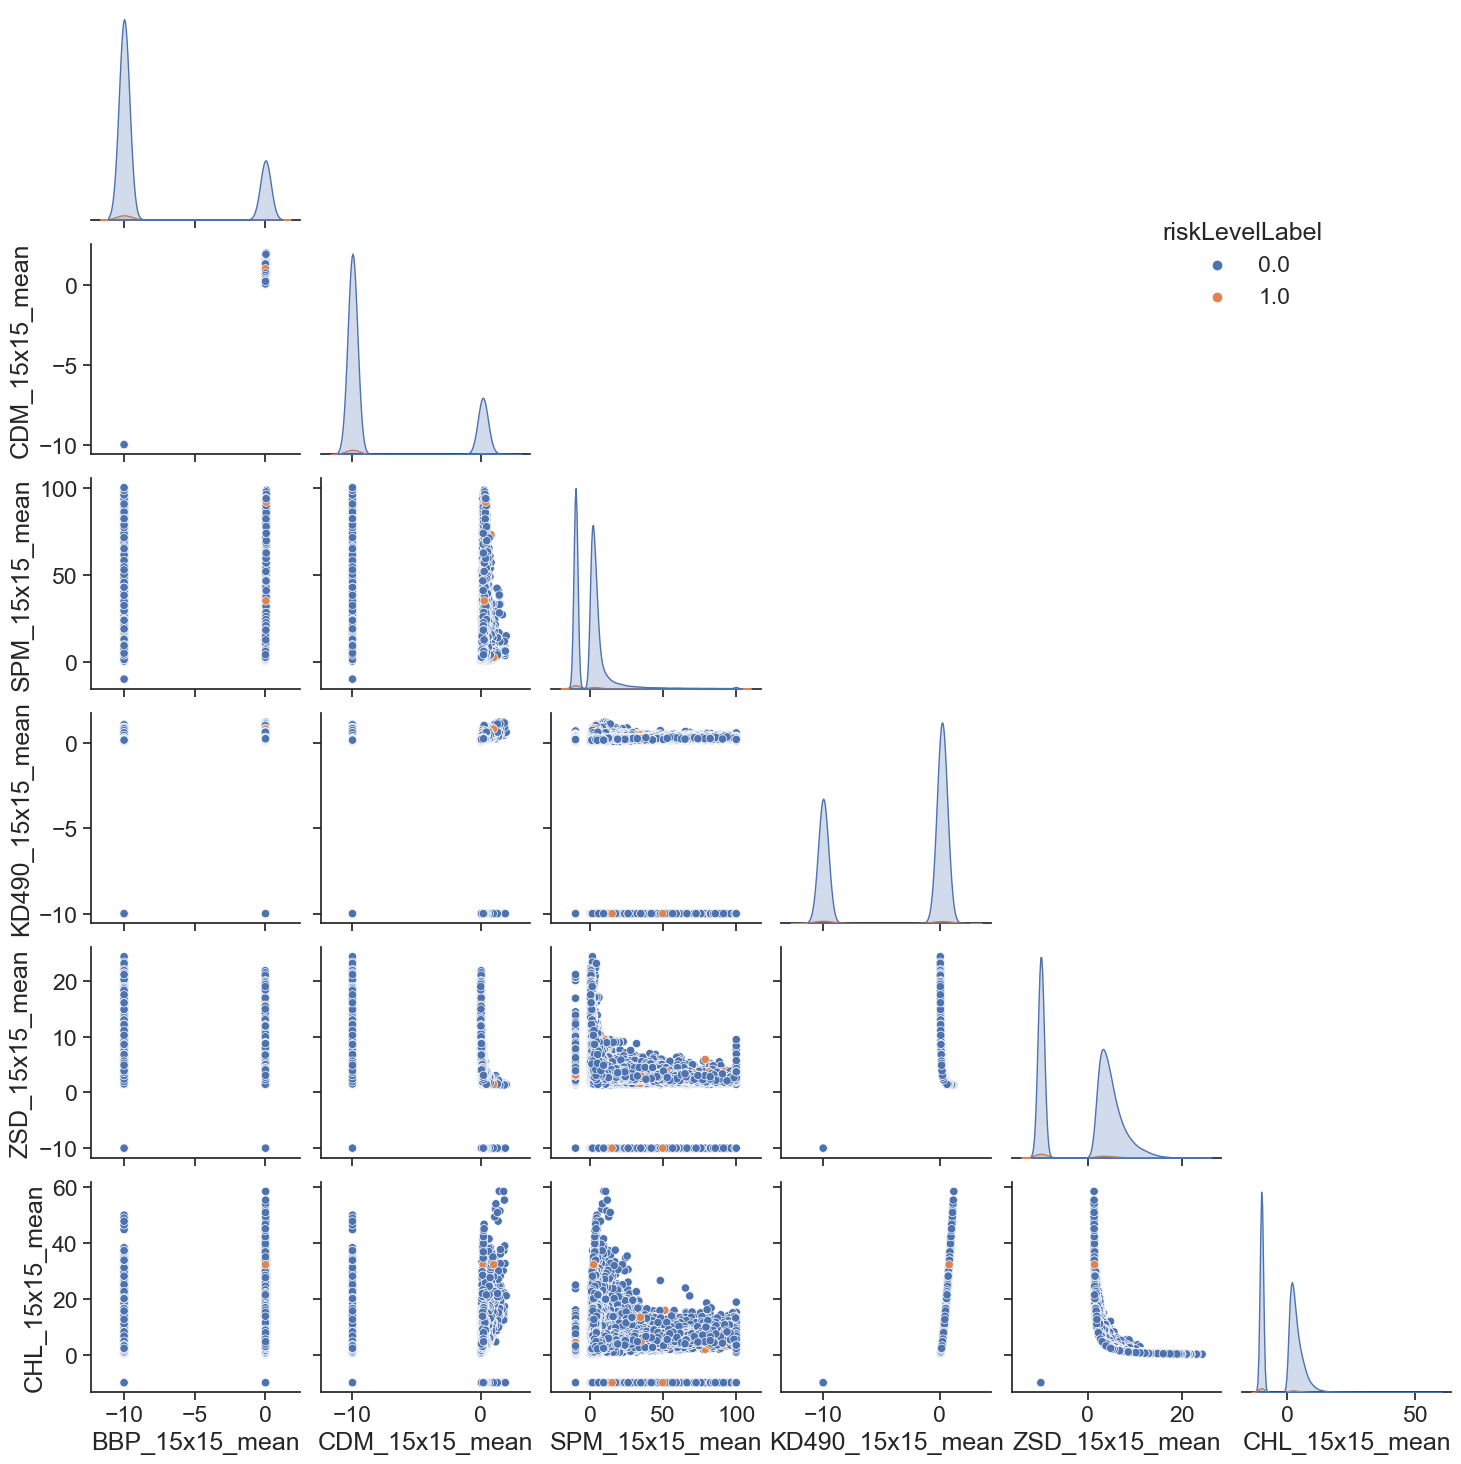

In [27]:
corr_columns_neg = ['riskLevelLabel'] + [col for col in df_neg.columns if col.endswith('15x15_mean')]
subset_df_neg = df_neg[corr_columns_neg].dropna()

sns.set(font_scale=1.5, style='ticks')
g = sns.pairplot(subset_df_neg, hue='riskLevelLabel', corner=True)

g._legend.set_bbox_to_anchor((0.8,0.8))

plt.show()

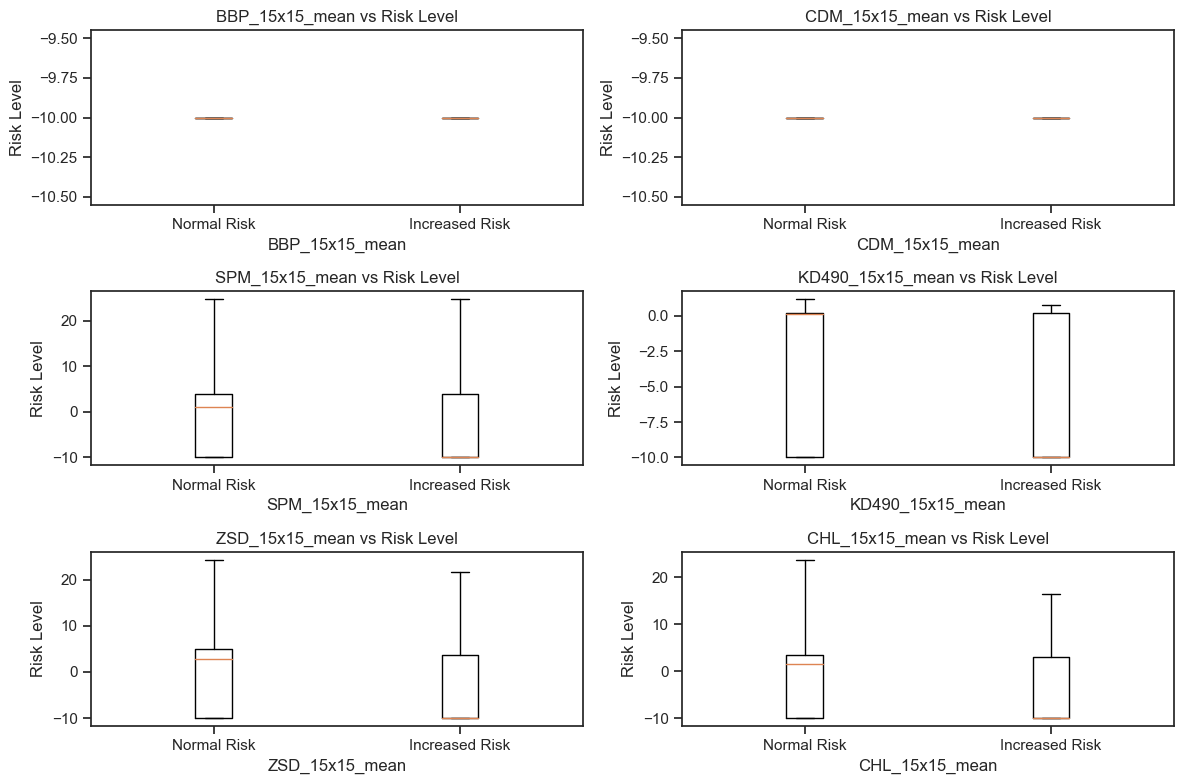

In [22]:
labels = [x for x in df_neg.columns if '15x15_mean' in x]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

for i, column in enumerate(labels):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    ax.boxplot([df_neg.loc[df_neg["riskLevelLabel"] == 0, labels[i]].dropna(),
                df_neg.loc[df_neg["riskLevelLabel"] == 1, labels[i]].dropna()],
               labels=["Normal Risk", "Increased Risk"], showfliers=False)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Risk Level")
    ax.set_title(f"{column} vs Risk Level")

plt.tight_layout()

#### Feature Dataset filled with Zero

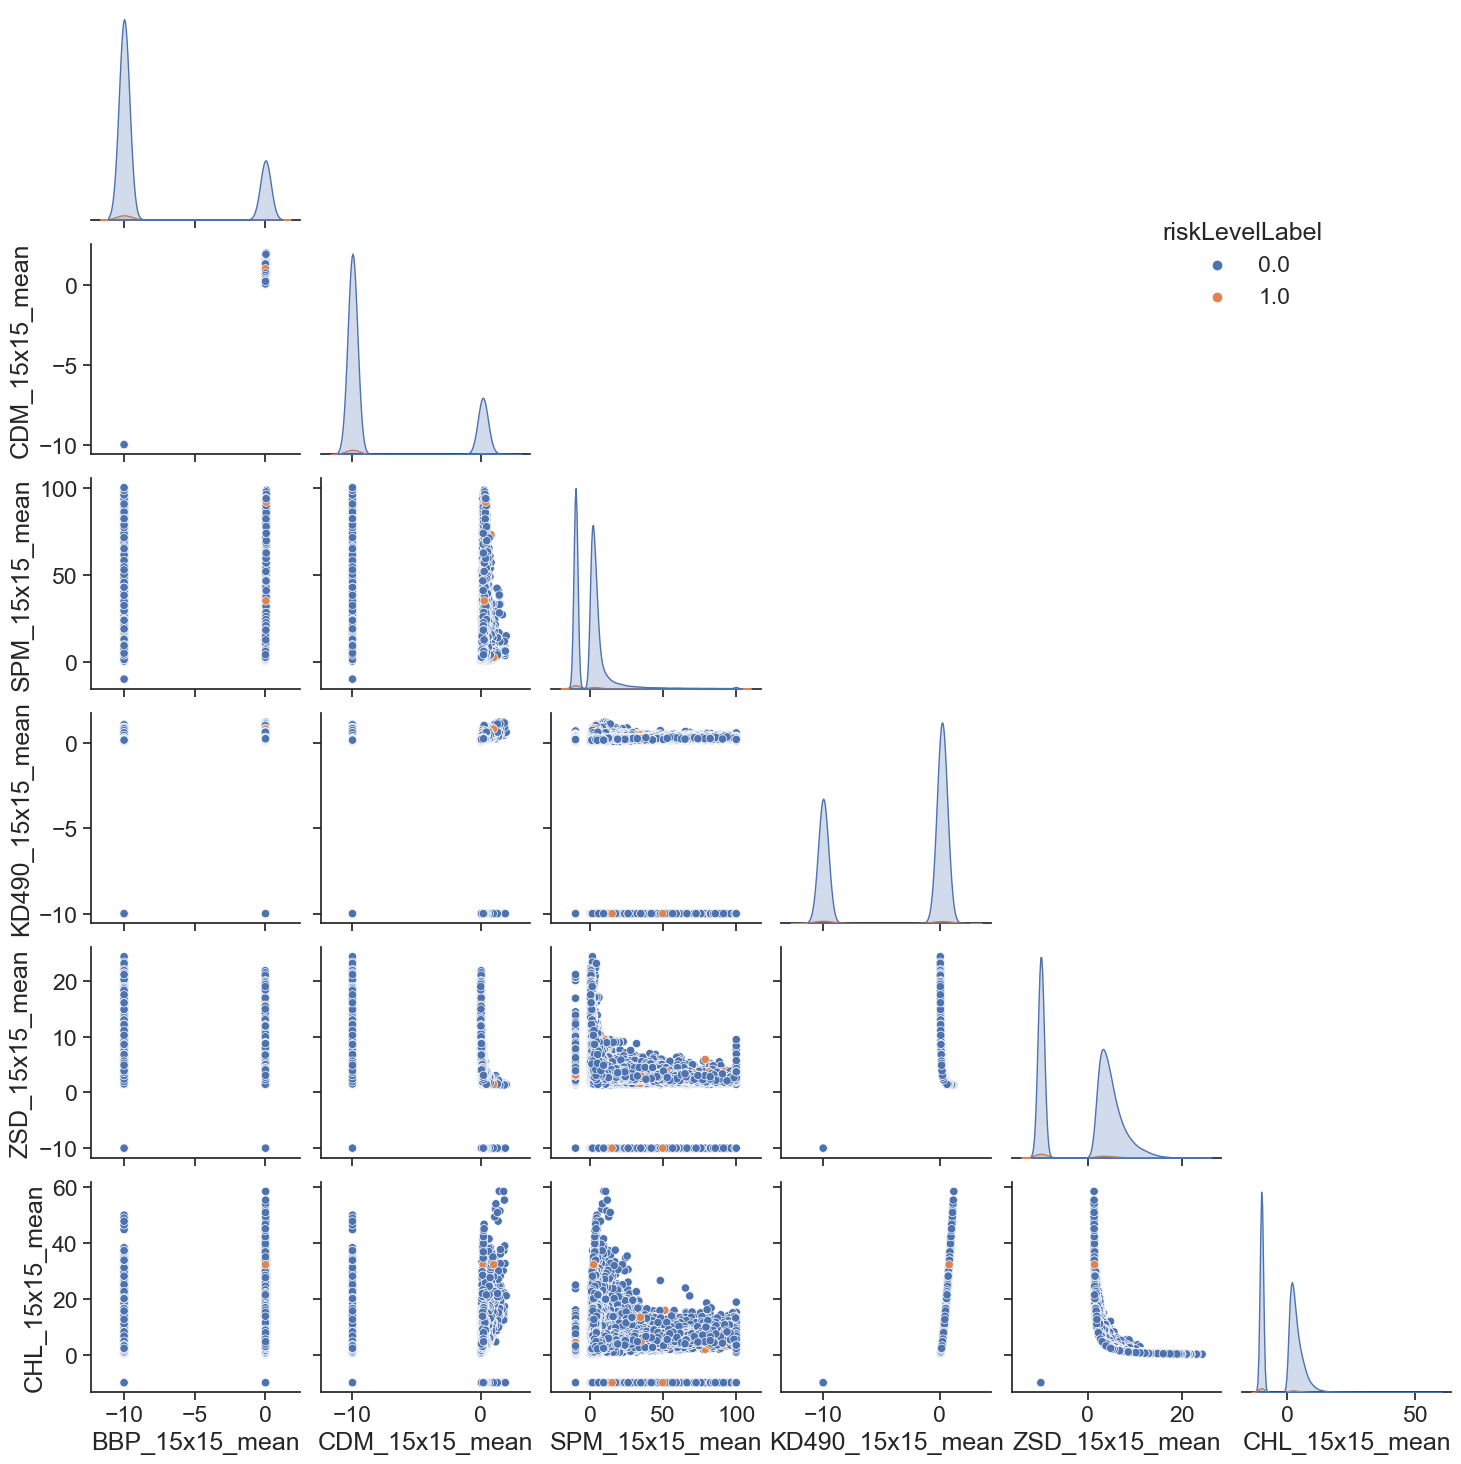

In [28]:
corr_columns_zero = ['riskLevelLabel'] + [col for col in df_zero.columns if col.endswith('15x15_mean')]
subset_df_zero = df_zero[corr_columns_zero].dropna()

sns.set(font_scale=1.5, style='ticks')
g = sns.pairplot(subset_df_neg, hue='riskLevelLabel', corner=True)

g._legend.set_bbox_to_anchor((0.8,0.8))

plt.show()

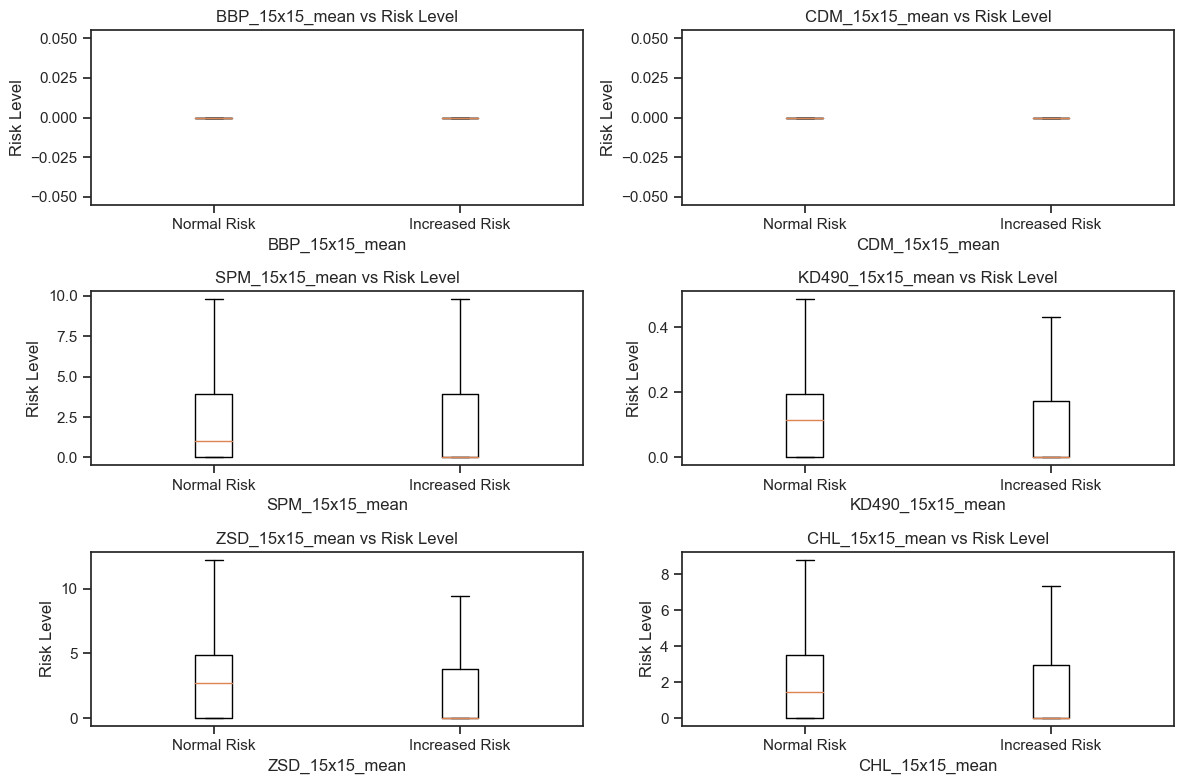

In [24]:
labels = [x for x in df_zero.columns if '15x15_mean' in x]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

for i, column in enumerate(labels):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    ax.boxplot([df_zero.loc[df_zero["riskLevelLabel"] == 0, labels[i]].dropna(),
                df_zero.loc[df_zero["riskLevelLabel"] == 1, labels[i]].dropna()],
               labels=["Normal Risk", "Increased Risk"], showfliers=False)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Risk Level")
    ax.set_title(f"{column} vs Risk Level")

plt.tight_layout()

### 5x5 window sized median

#### Feature Dataset without filling Missing Value

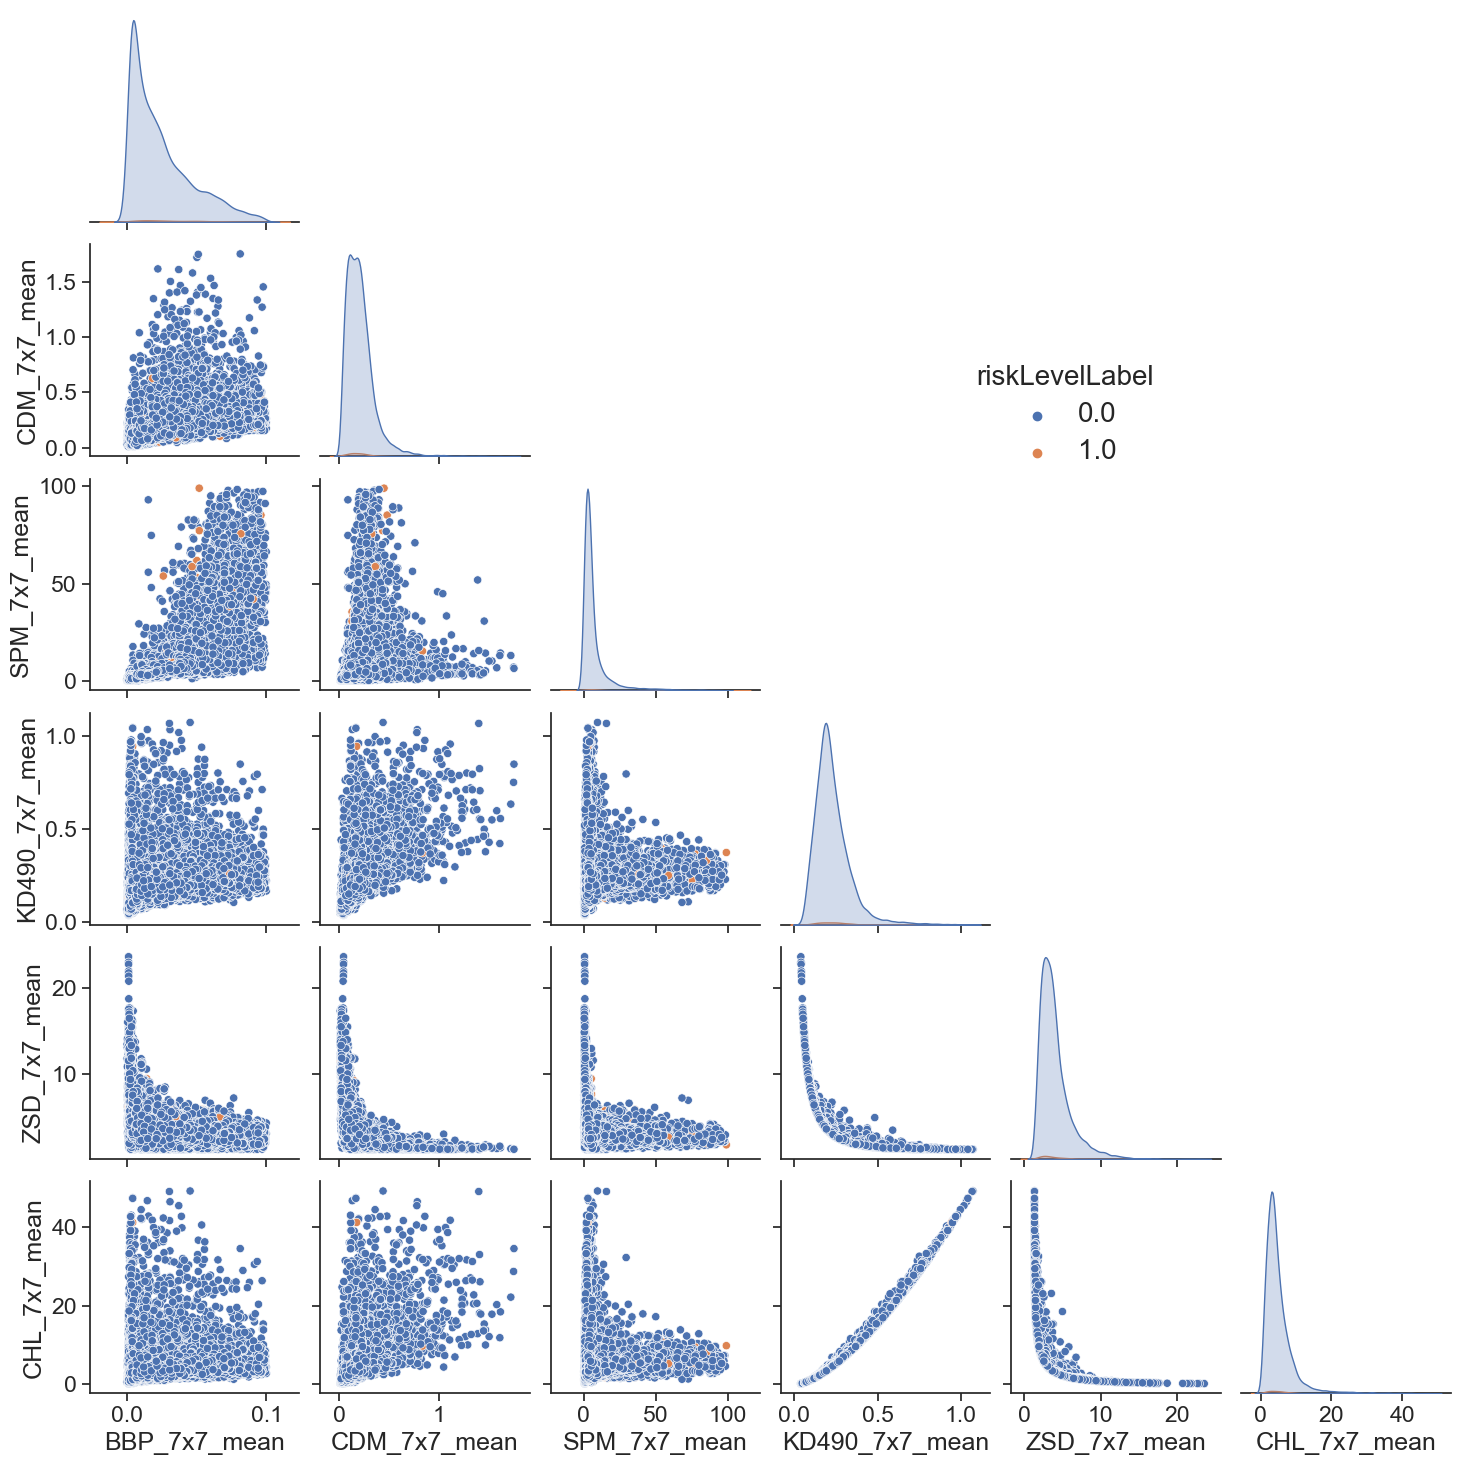

In [66]:
corr_columns_neg = ['riskLevelLabel'] + [col for col in df.columns if col.endswith('7x7_mean')]
subset_df = df[corr_columns_neg].dropna()

sns.set(font_scale=1.5, style='ticks')
g = sns.pairplot(subset_df, hue='riskLevelLabel', corner=True)

g._legend.set_bbox_to_anchor((0.7,0.7))
for text in g._legend.texts:
    text.set_fontsize(20)
g._legend.get_title().set_fontsize(20)

plt.show()

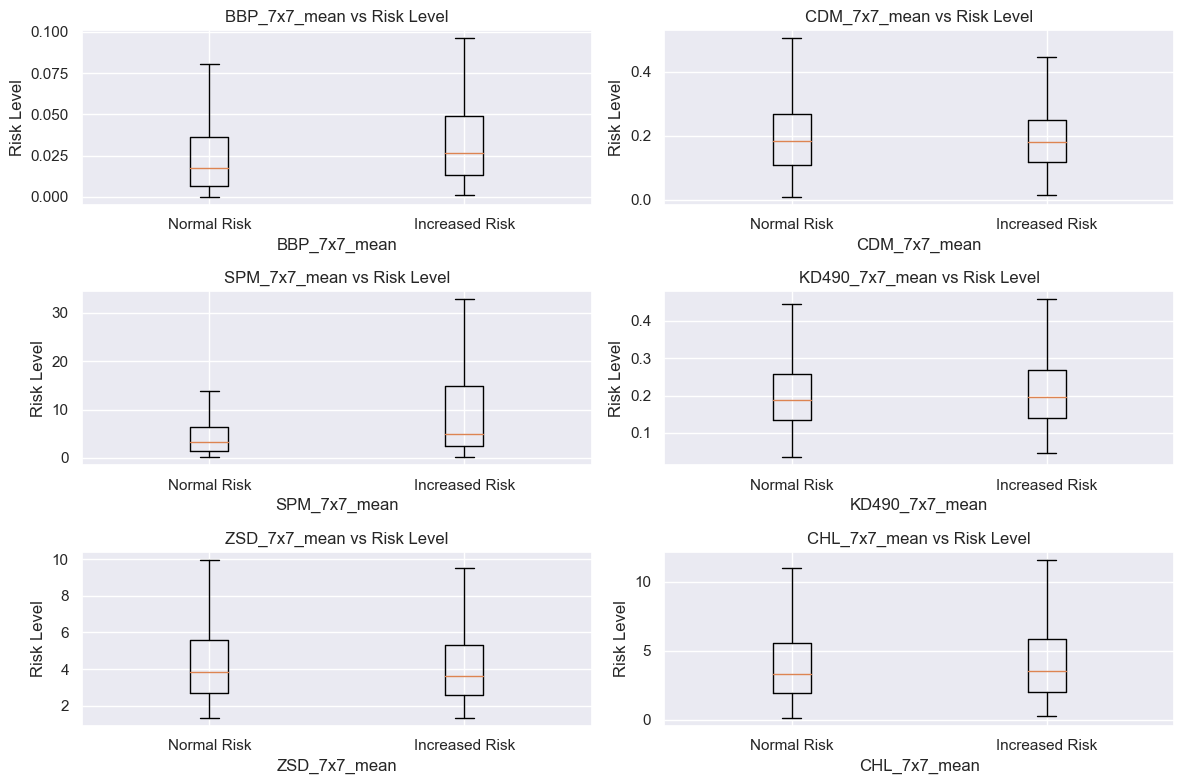

In [68]:
labels = [x for x in df.columns if '7x7_mean' in x]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
sns.set(font_scale=1)

for i, column in enumerate(labels):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    g = ax.boxplot([df.loc[df["riskLevelLabel"] == 0, labels[i]].dropna(),
                    df.loc[df["riskLevelLabel"] == 1, labels[i]].dropna()],
                    labels=["Normal Risk", "Increased Risk"], showfliers=False)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Risk Level")
    ax.set_title(f"{column} vs Risk Level")

plt.tight_layout()